In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import glob
from pprint import pprint
from scripts.constants import COLUMNS_FOR_DATASET

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
BU_FOLDER2 = os.path.join(os.path.dirname(CURRENT_FOLDER), "cluster_backup", "gradu_cluster_backup_16042023")

In [4]:
ci_coverage_files = glob.glob(os.path.join(BU_FOLDER2, "results", 'ci_coverage_napsu_independence_pruning_*.csv'))

In [5]:
pprint(ci_coverage_files)

['/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_01e_education-num+sex.csv',
 '/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_01e_education-num+hours-per-week.csv',
 '/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_80e_age+education-num.csv',
 '/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_01e_all.csv',
 '/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_03e_education-num+sex.csv',
 '/home/local/jarlehti/projects/cluster_backup/gradu_cluster_backup_16042023/r

In [6]:
df = pd.read_csv(ci_coverage_files[0])
df

original_dataset_name  index  n_datasets  conf_int_range  \
0     adult_independence_pruning      0         100            0.05   
1     adult_independence_pruning      0         100            0.05   
2     adult_independence_pruning      0         100            0.05   
3     adult_independence_pruning      0         100            0.05   
4     adult_independence_pruning      0         100            0.10   
...                          ...    ...         ...             ...   
3795  adult_independence_pruning     49         100            0.90   
3796  adult_independence_pruning     49         100            0.95   
3797  adult_independence_pruning     49         100            0.95   
3798  adult_independence_pruning     49         100            0.95   
3799  adult_independence_pruning     49         100            0.95   

      conf_int_start  conf_int_end  conf_int_width  true_parameter_value  \
0           0.066910      0.093592        0.026682              0.008048   
1          -0.149779     -0.145995        0.003784             -0.107231   
2           0.296285      0.334766        0.038481              0.082457   
3           0.933863      0.994584        0.060721              0.644892   
4          -0.013991      0.041909        0.055899              0.008048   
...              ...           ...             ...                   ...   
3795        0.149884      1.668187        1.518303              0.644892   
3796       -0.432062      0.489763        0.921824              0.008048   
3797       -0.210802     -0.070718        0.140084             -0.107231   
3798       -0.309918      0.925230        1.235149              0.082457   
3799       -0.020204      1.748696        1.768900              0.644892   

      contains_true_parameter      missing_query experiment_id  epsilon  
0                       False  education-num+sex      A7DYQ0I4      0.1  
1                       False  education-num+sex      A7DYQ0I4      0.1  
2                       False  education-num+sex      A7DYQ0I4      0.1  
3                       False  education-num+sex      A7DYQ0I4      0.1  
4                        True  education-num+sex      A7DYQ0I4      0.1  
...                       ...                ...           ...      ...  
3795                     True  education-num+sex      A7DYQ0I4      0.1  
3796                     True  education-num+sex      A7DYQ0I4      0.1  
3797                     True  education-num+sex      A7DYQ0I4      0.1  
3798                     True  education-num+sex      A7DYQ0I4      0.1  
3799                     True  education-num+sex      A7DYQ0I4      0.1  

[3800 rows x 12 columns]

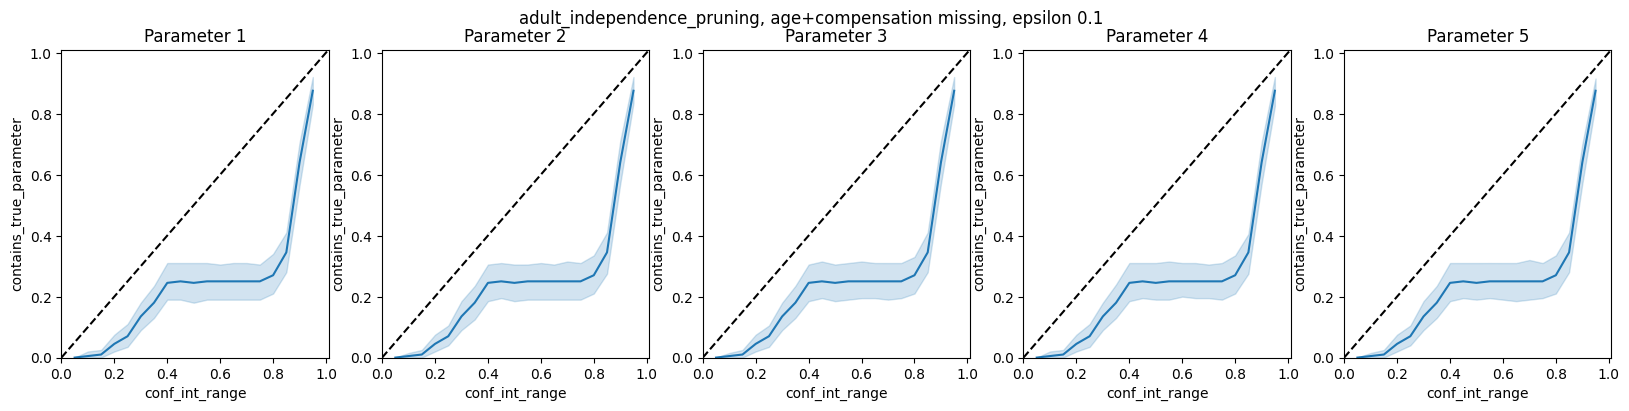

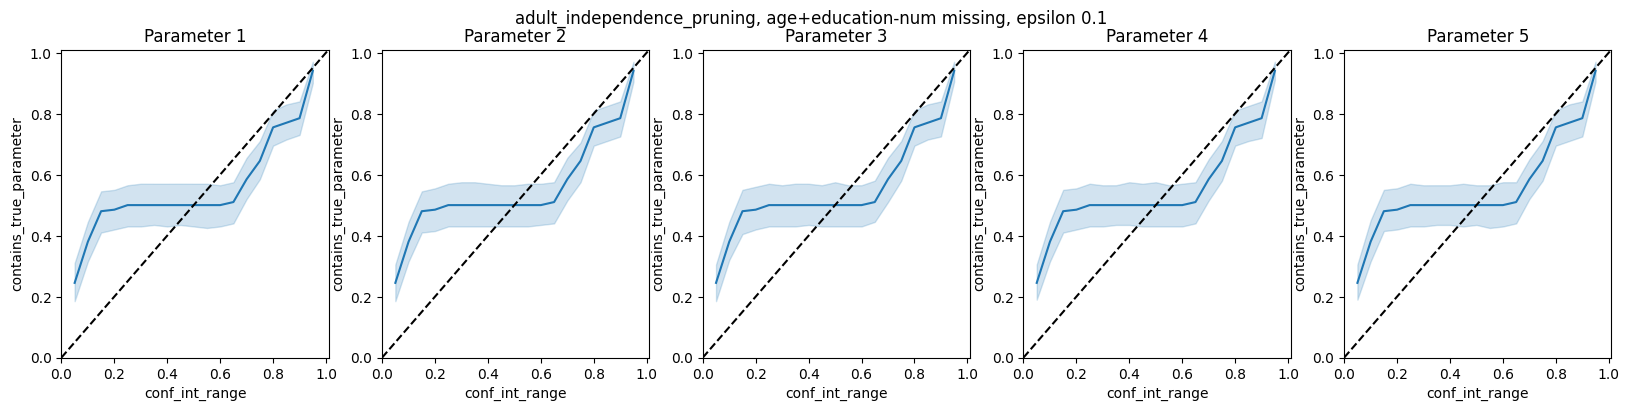

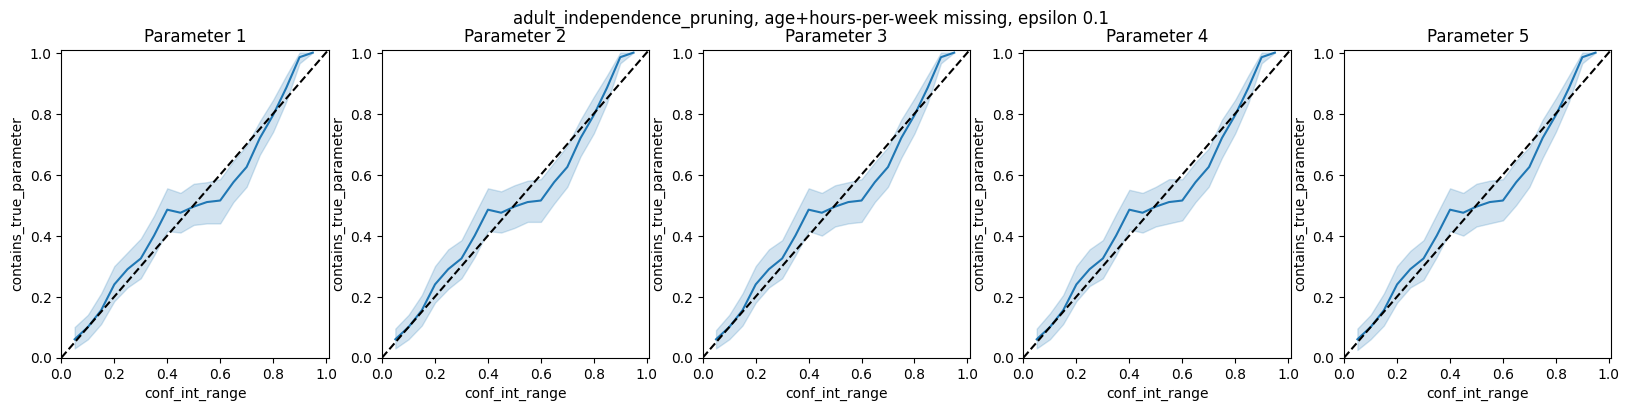

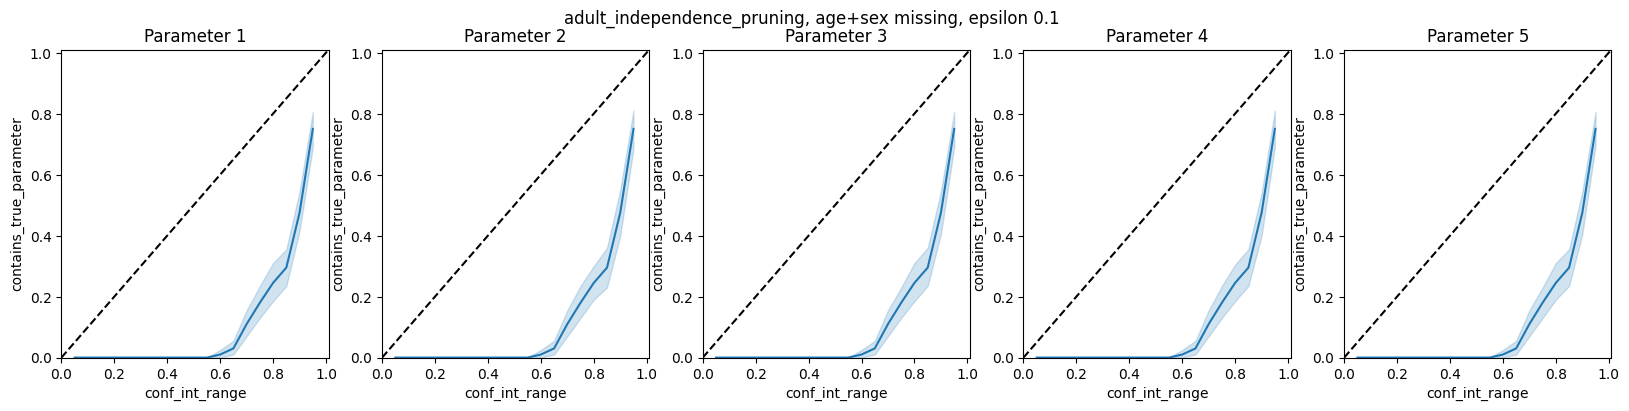

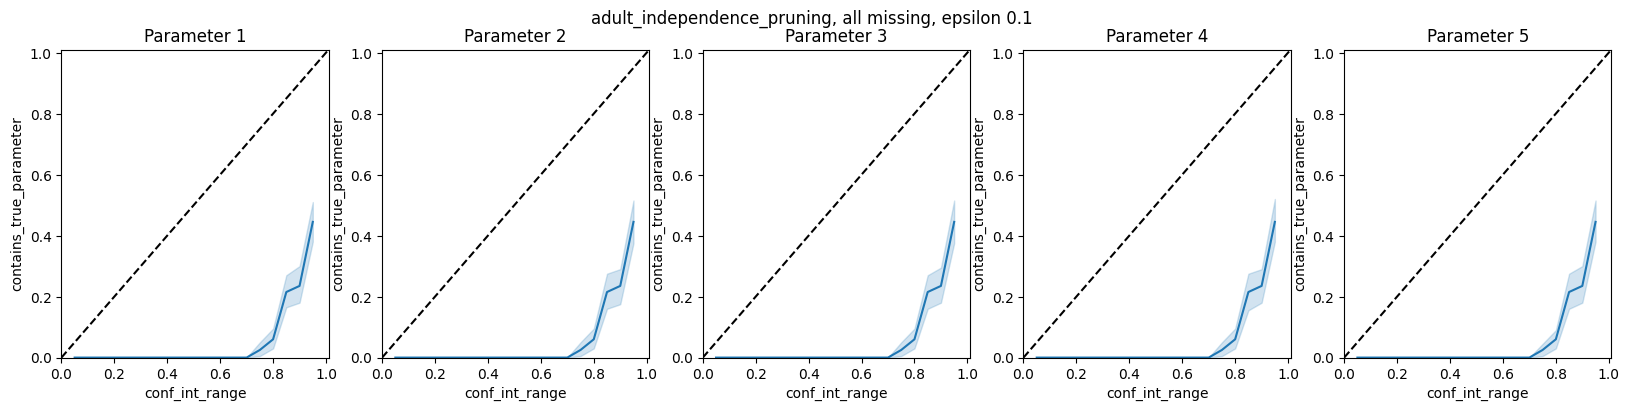

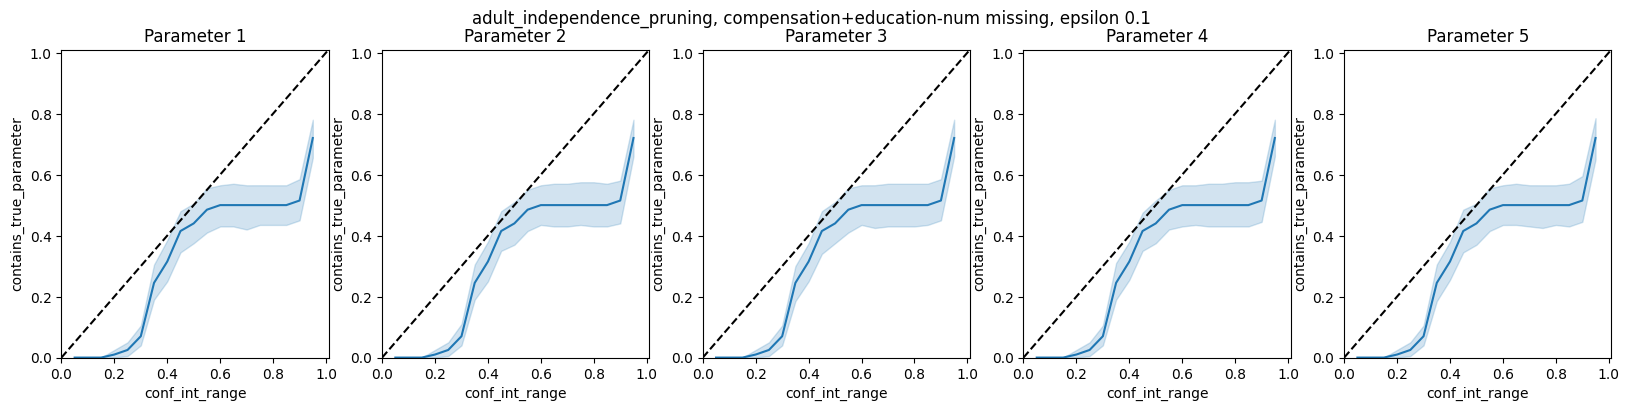

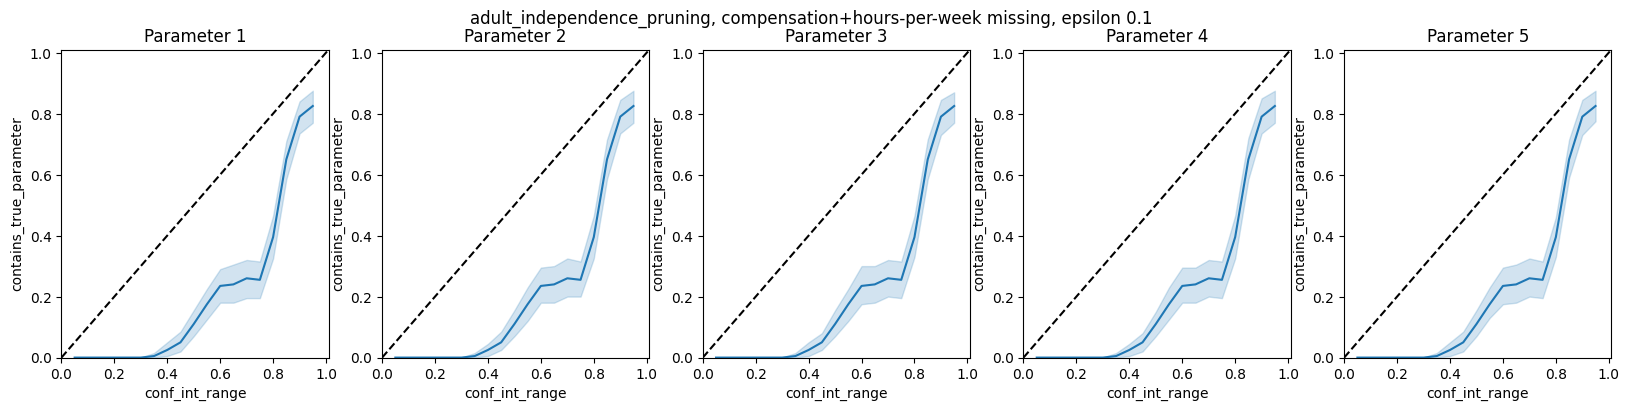

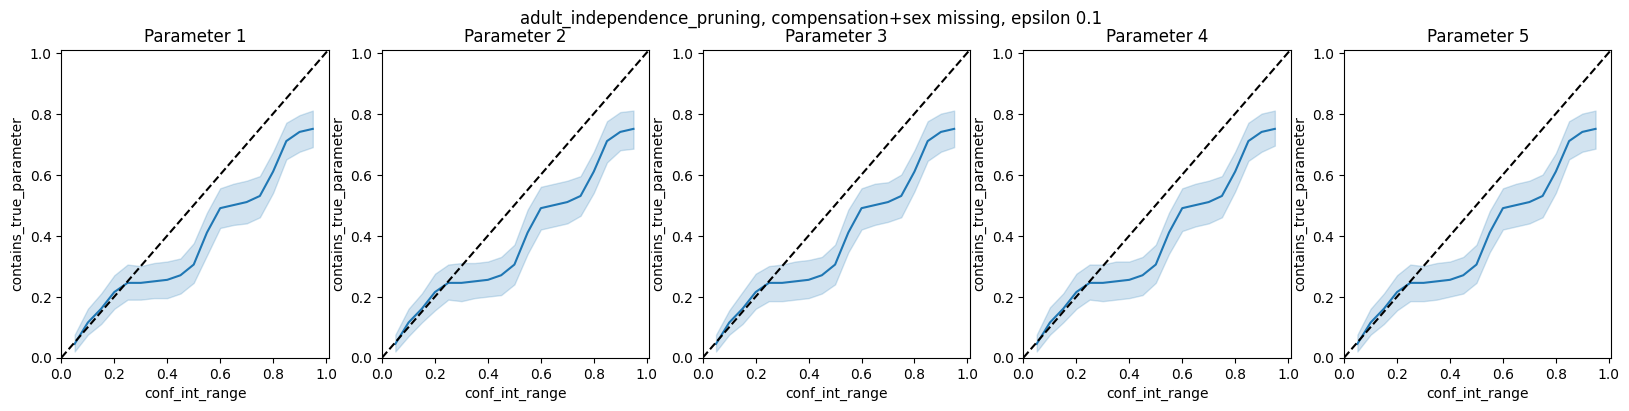

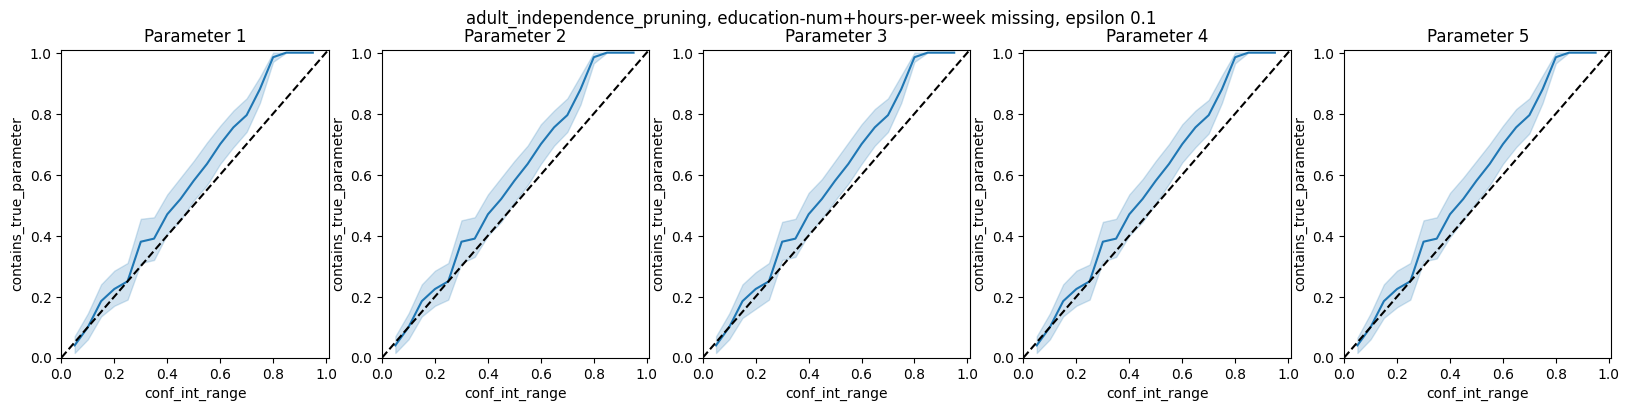

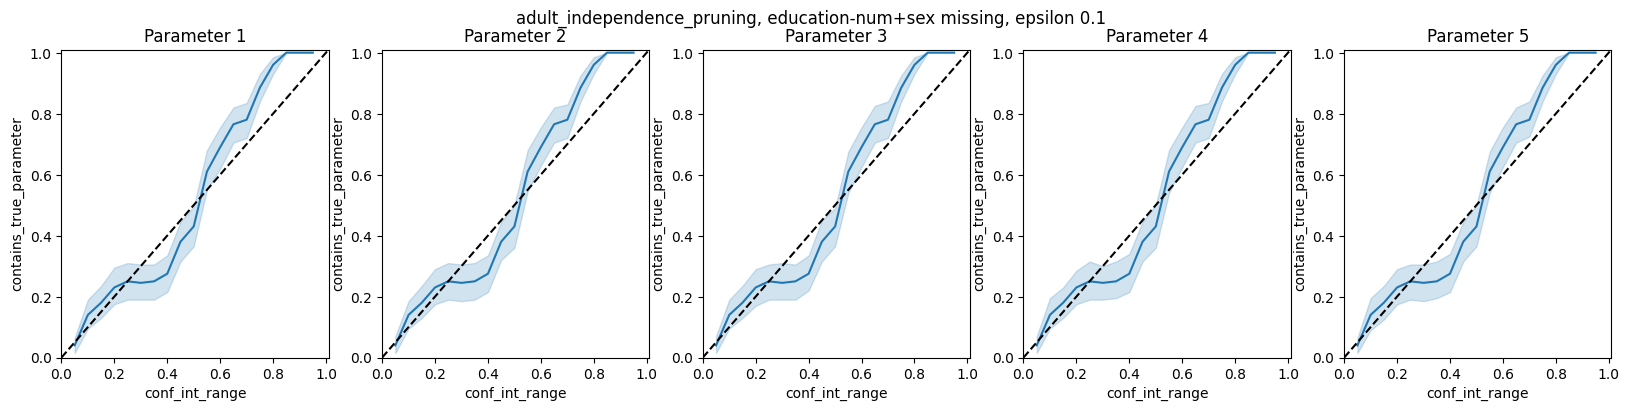

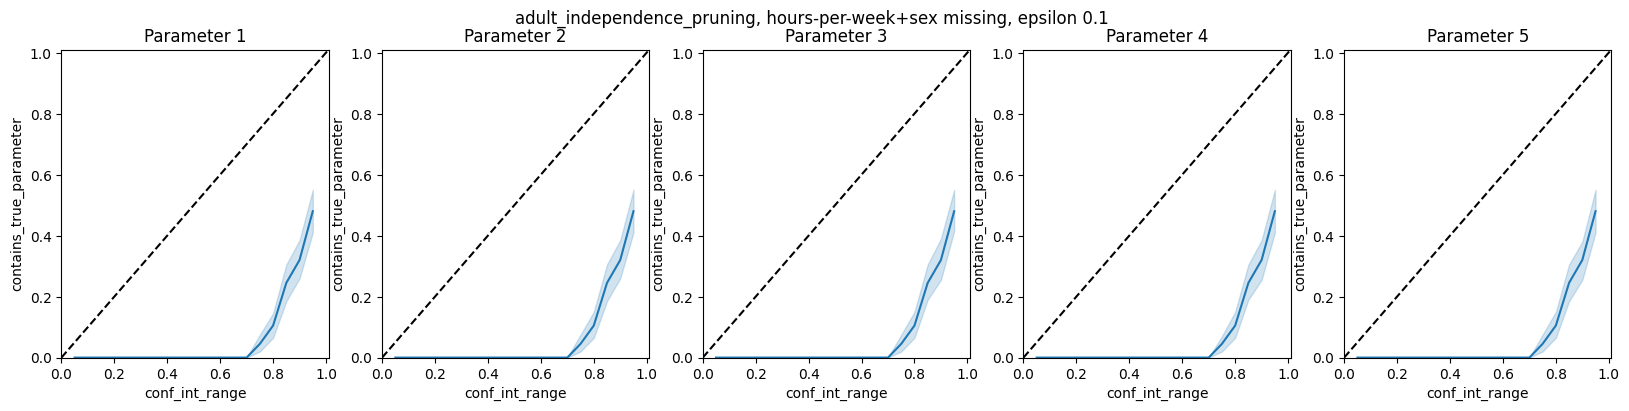

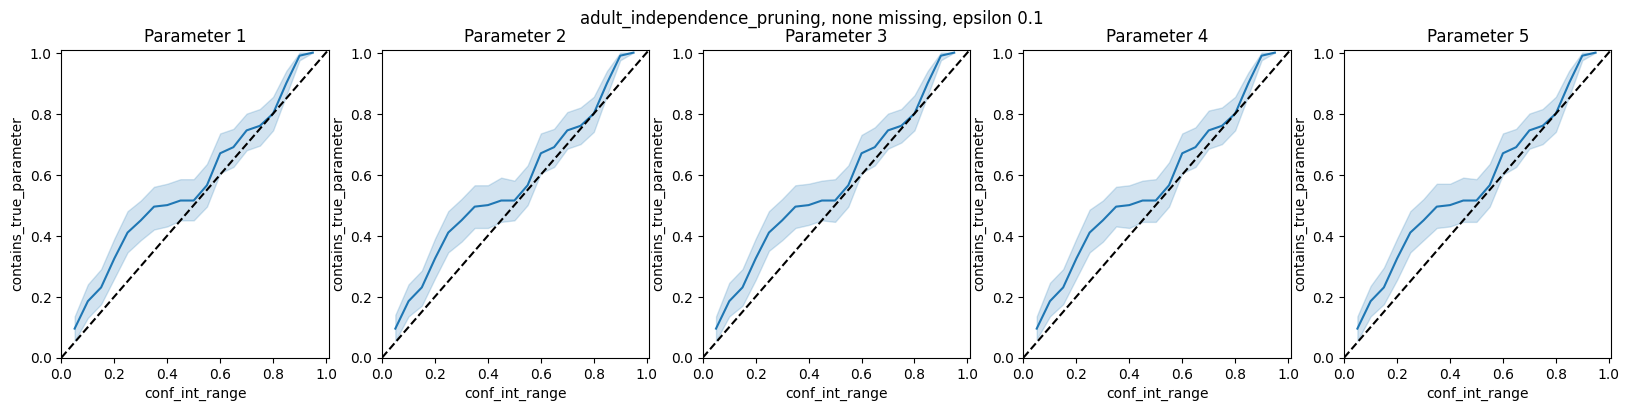

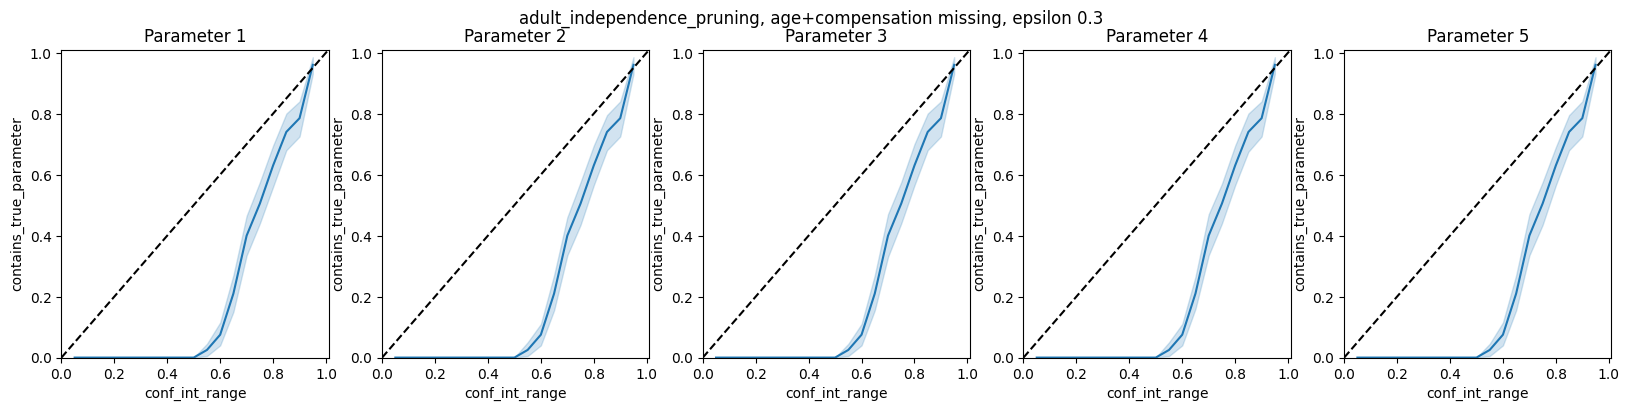

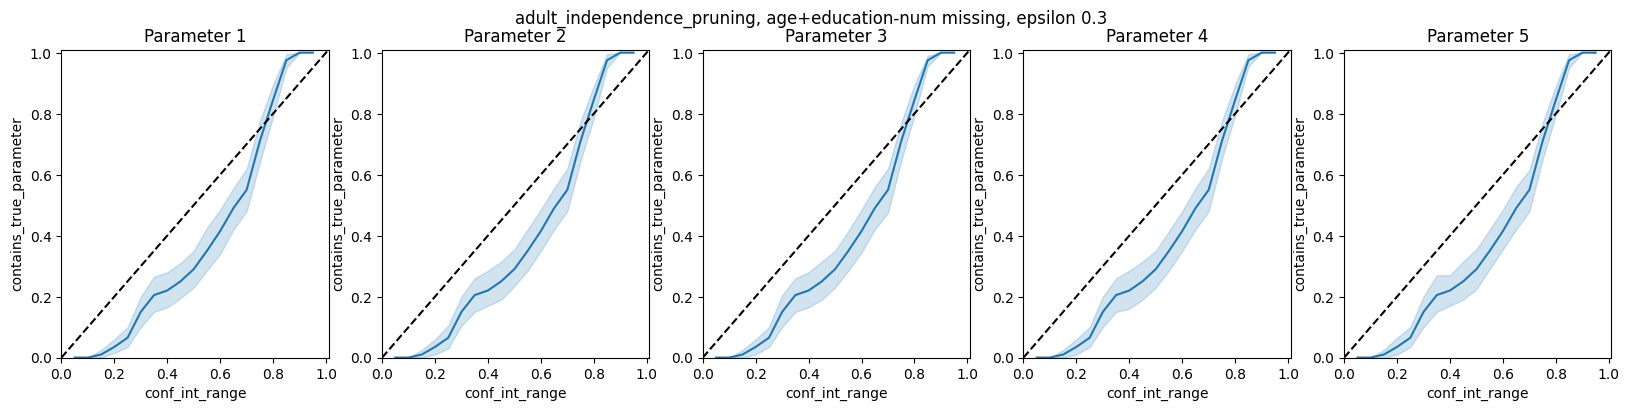

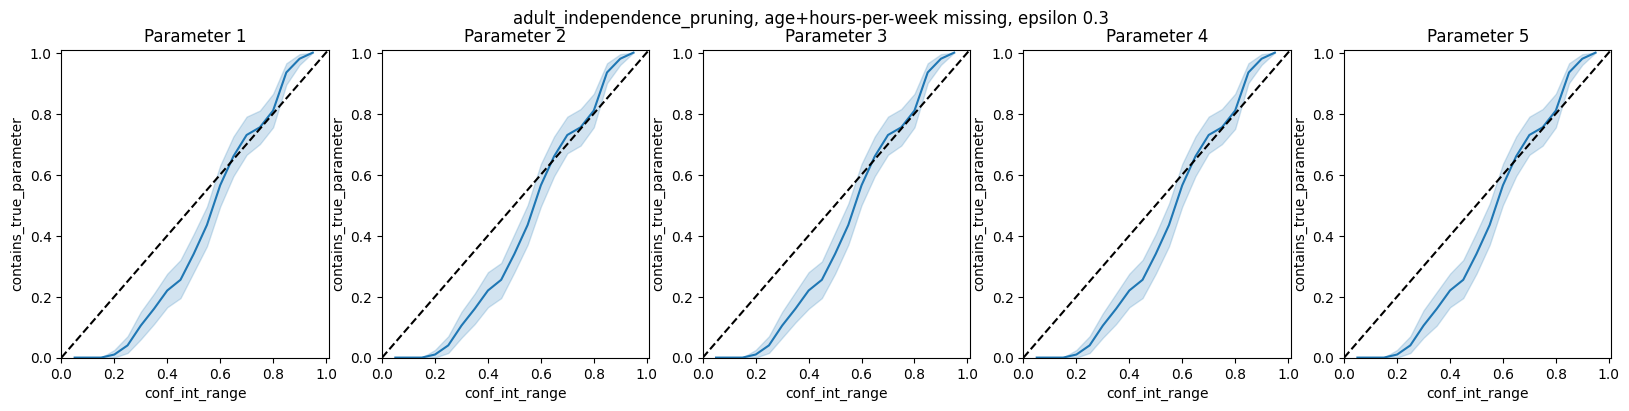

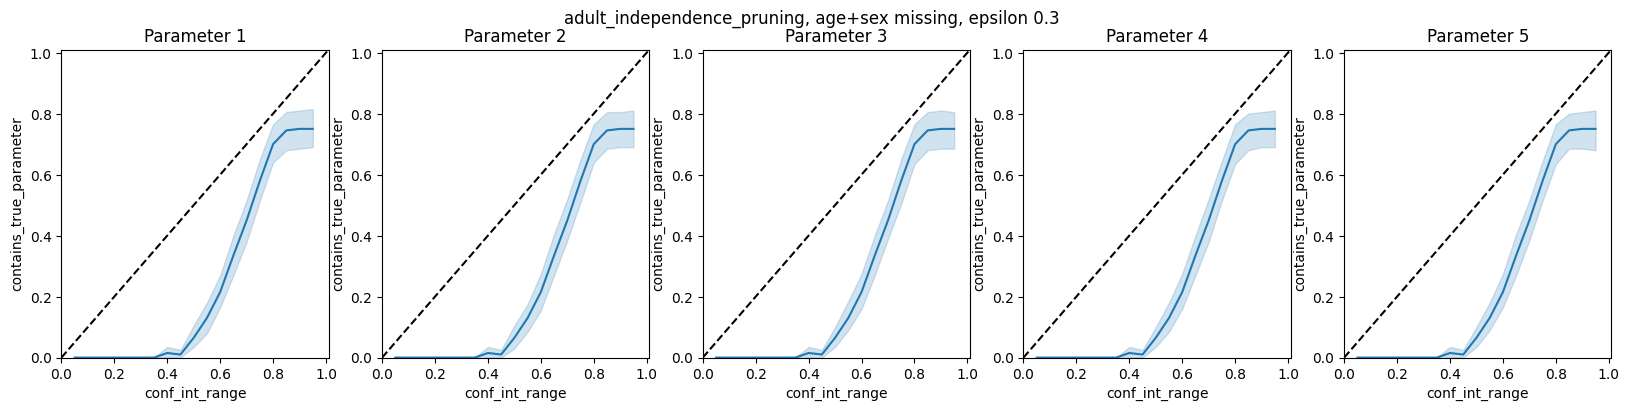

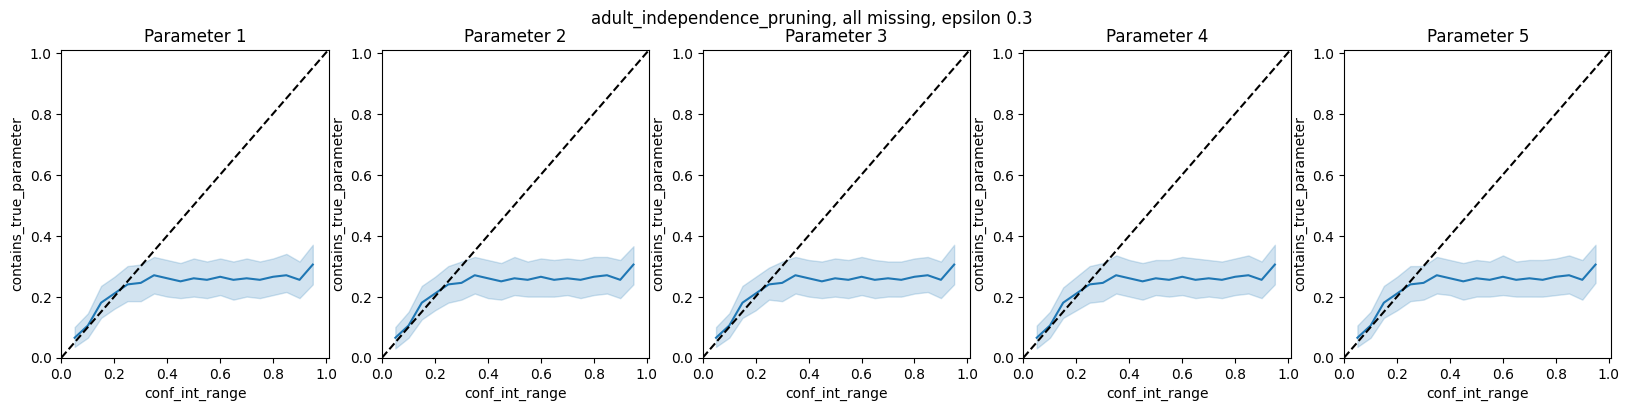

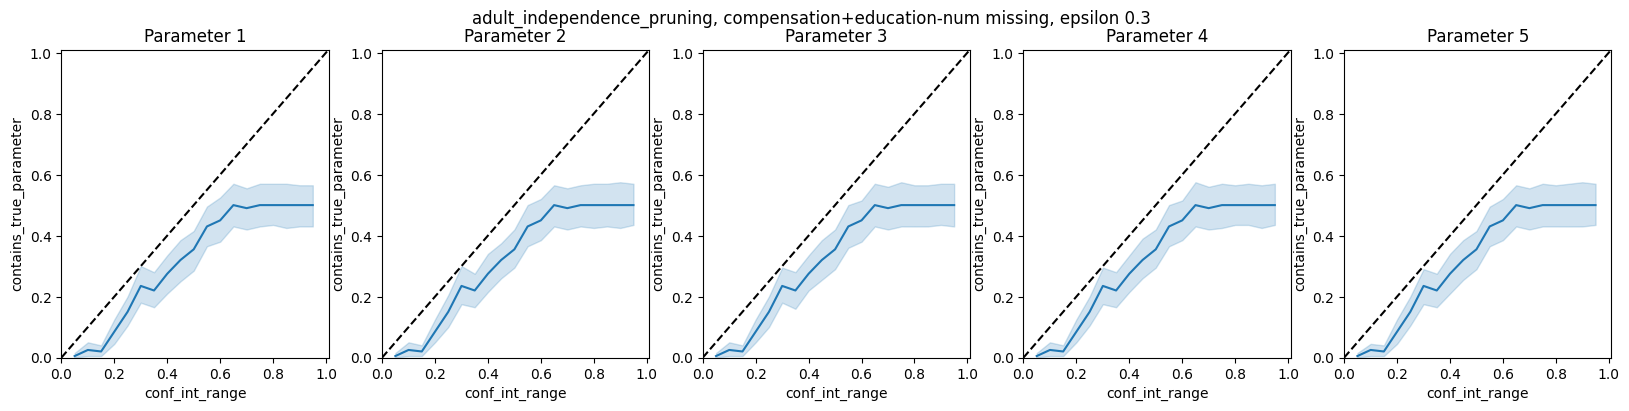

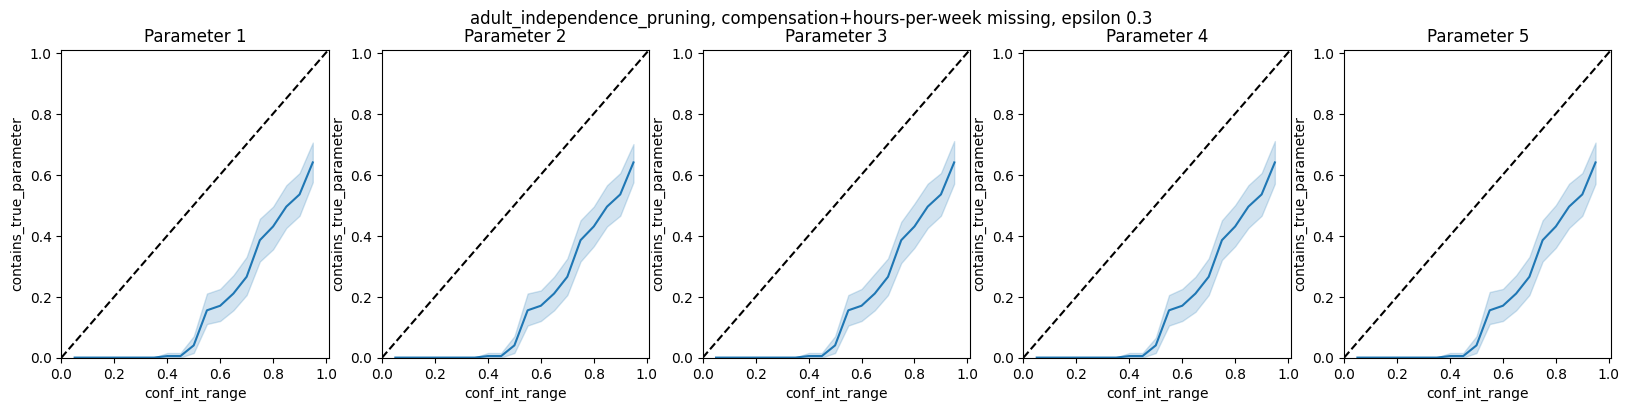

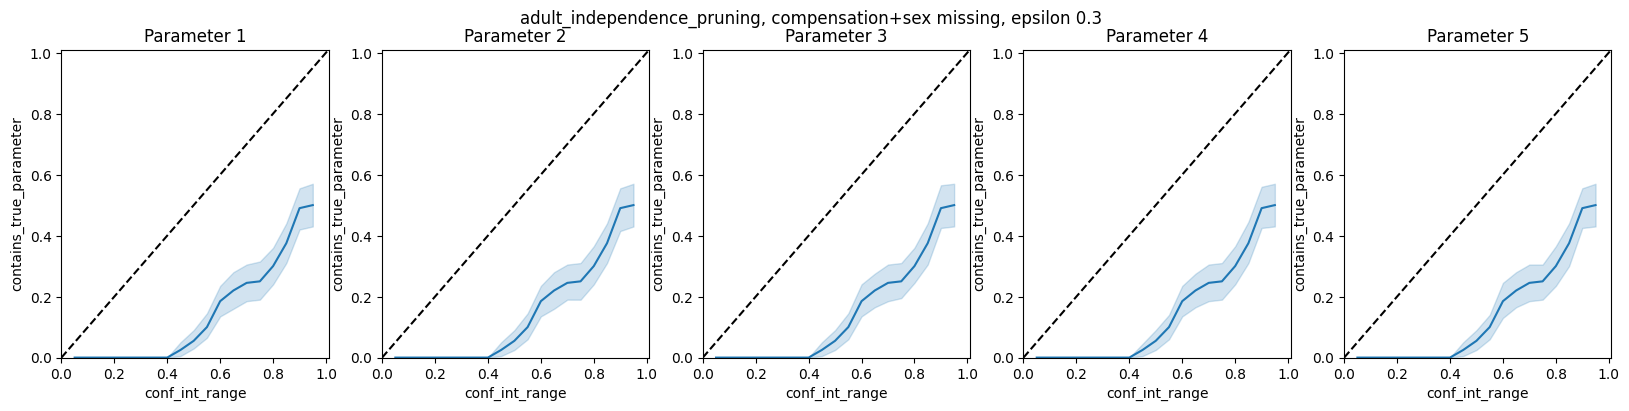

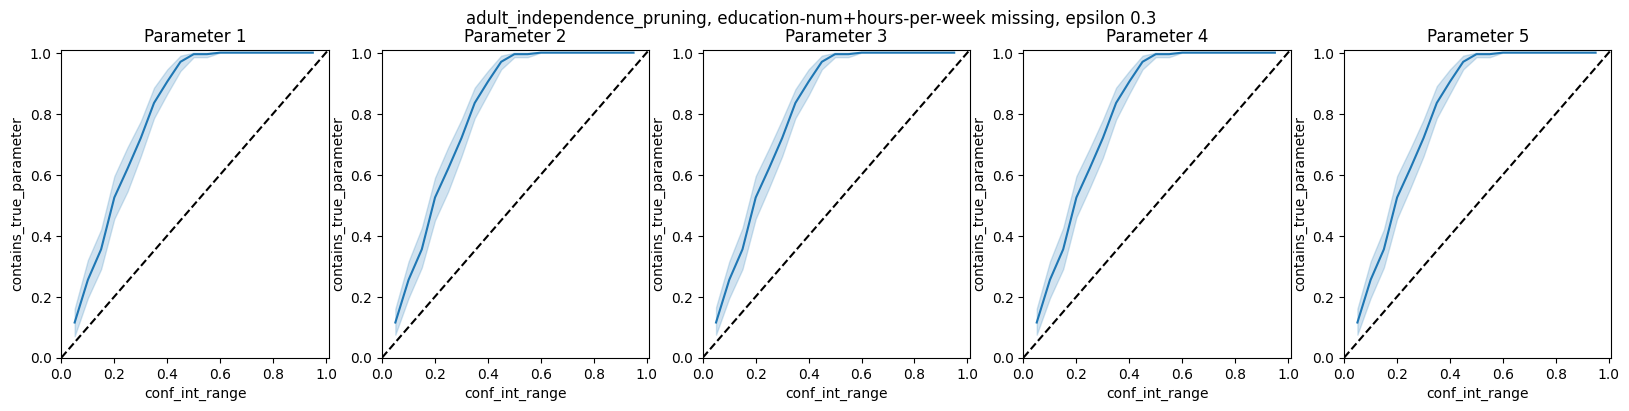

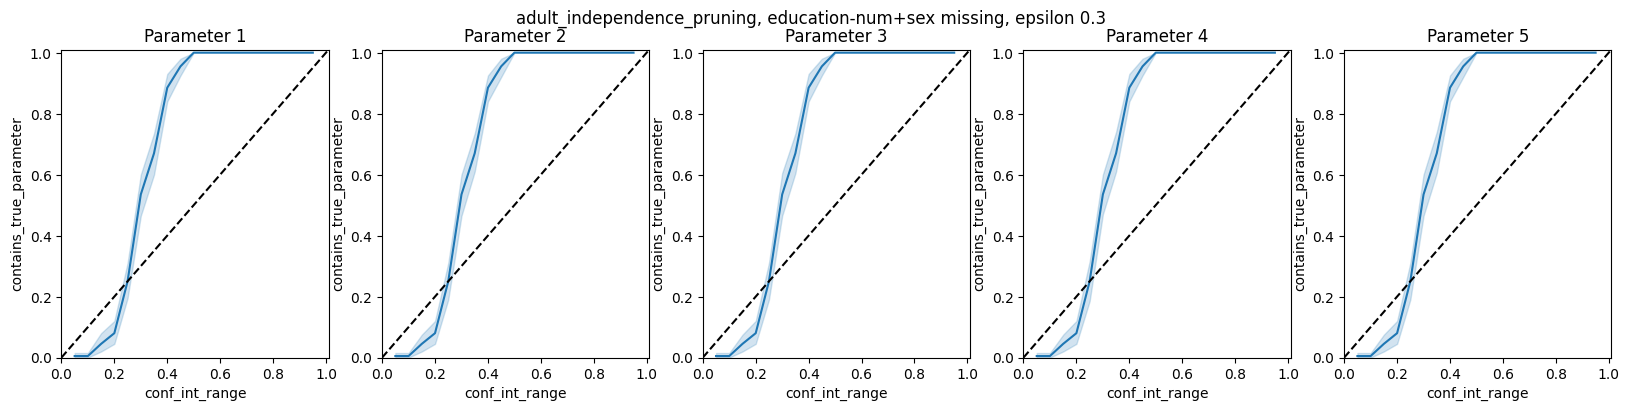

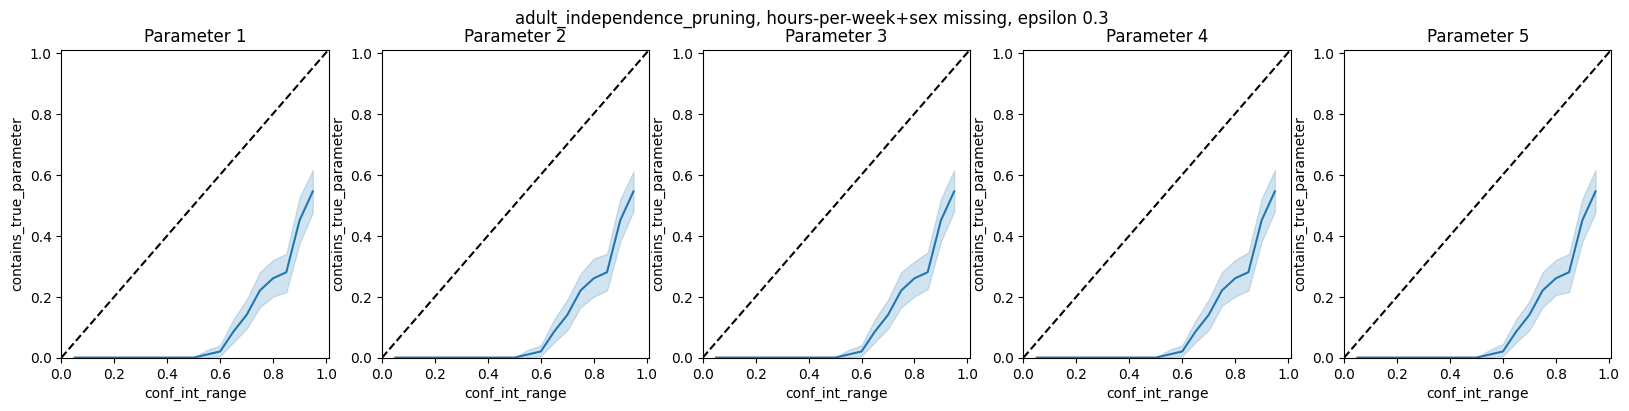

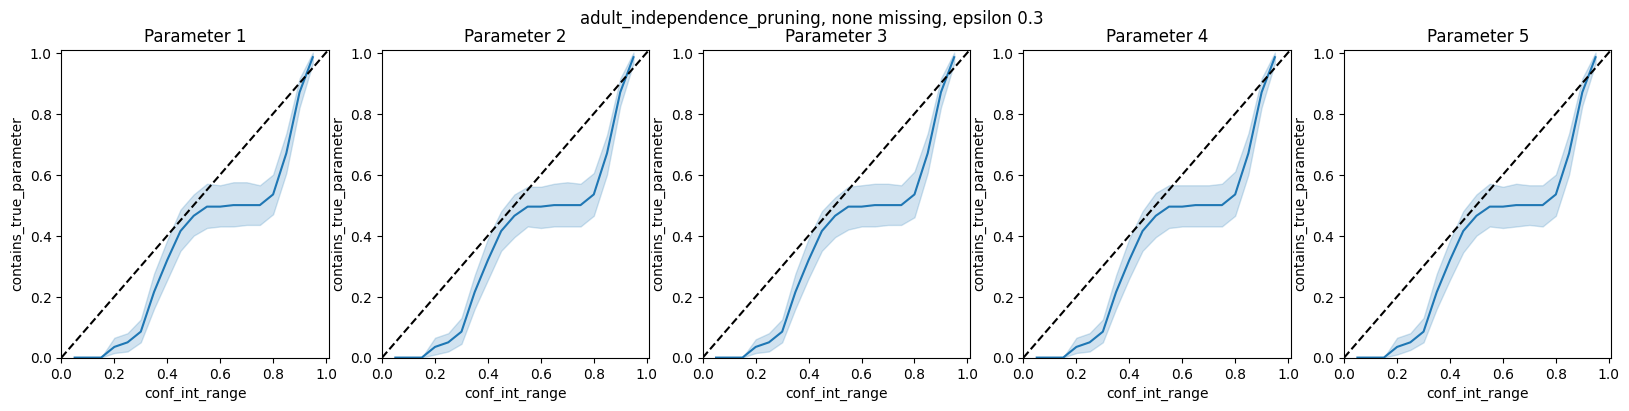

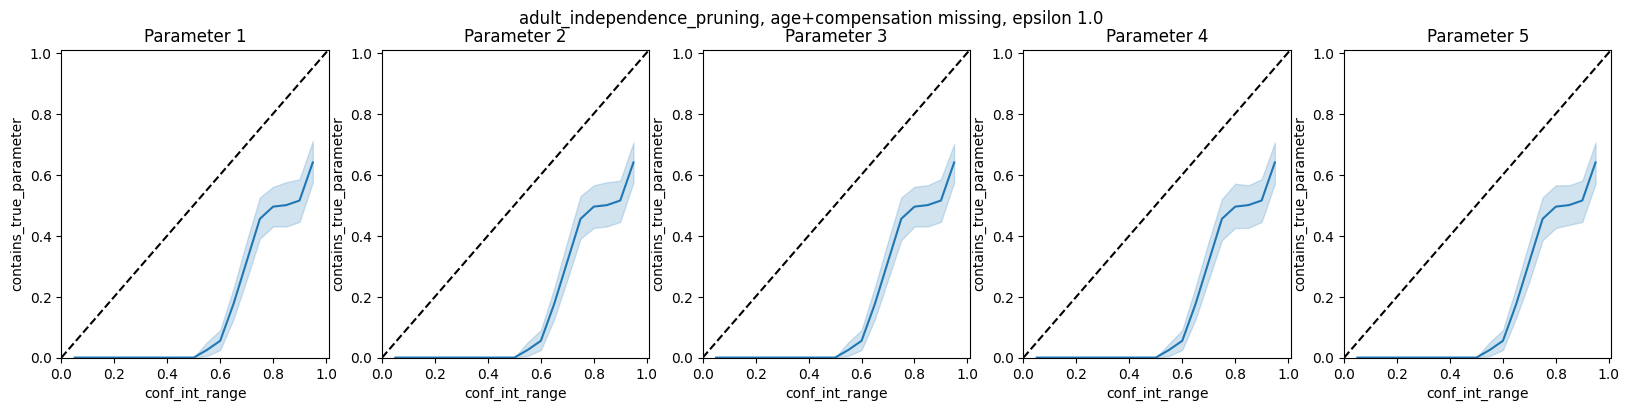

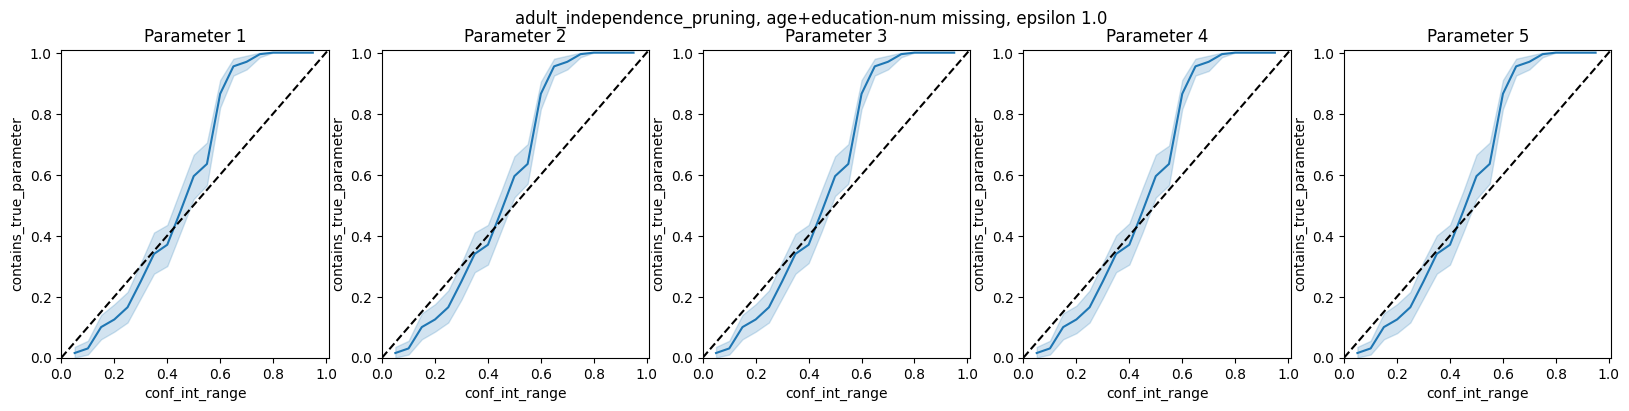

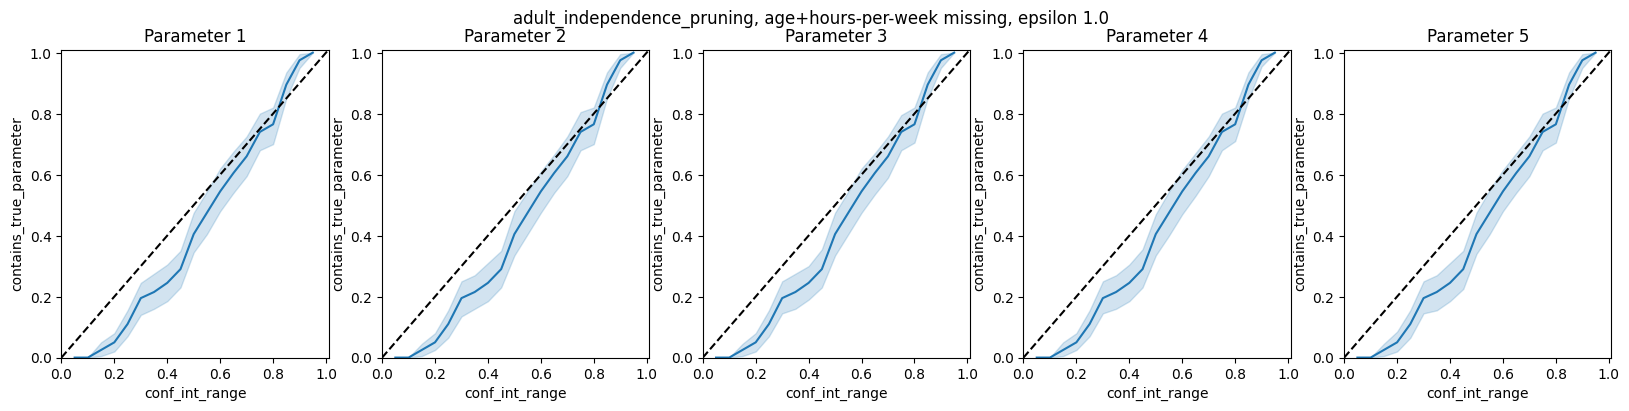

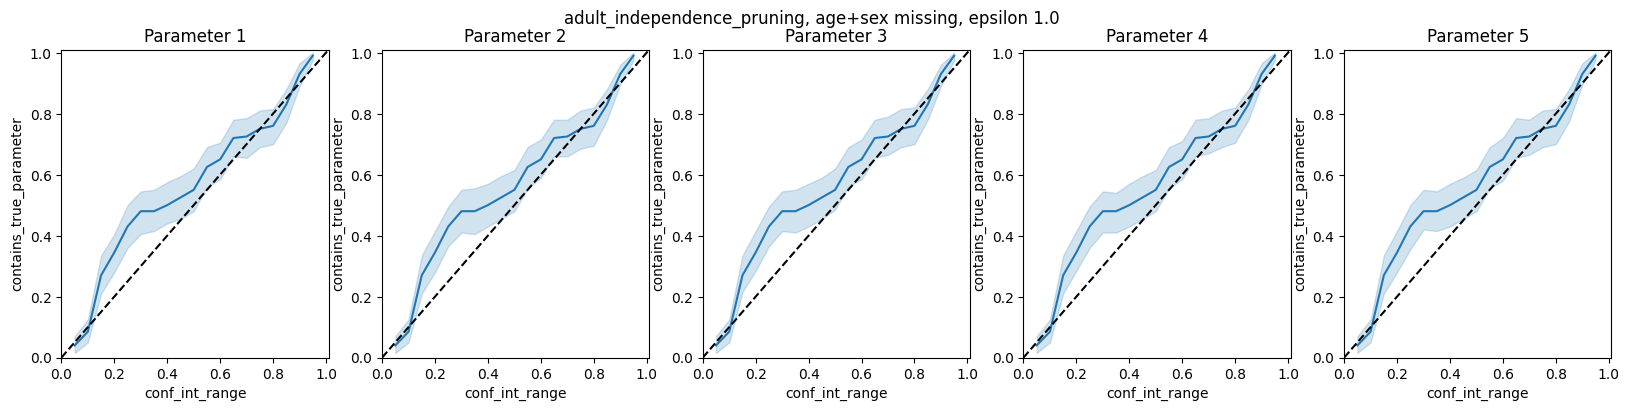

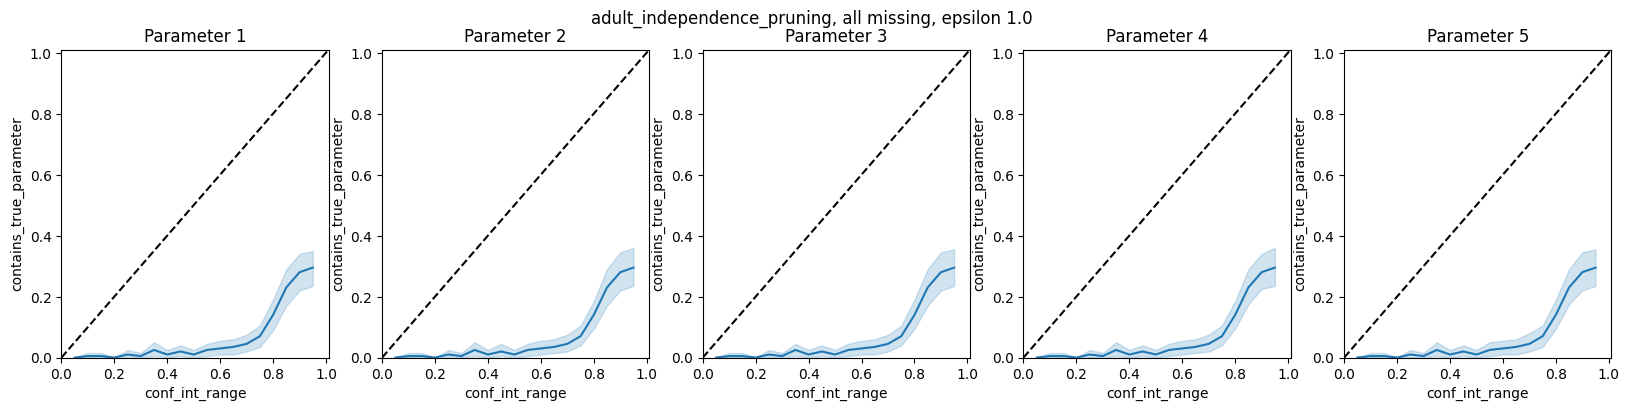

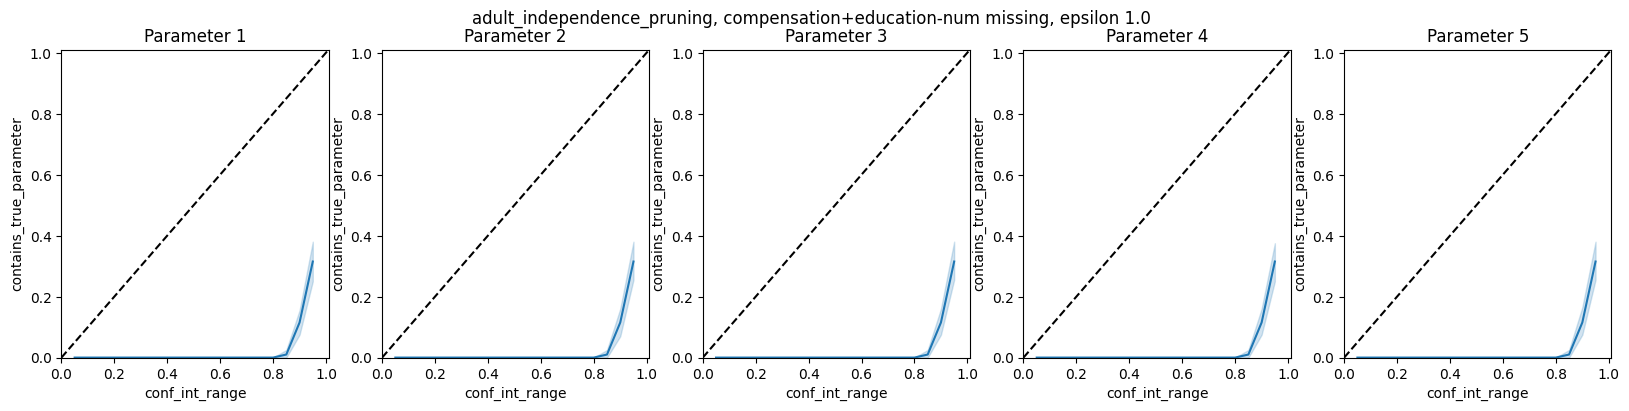

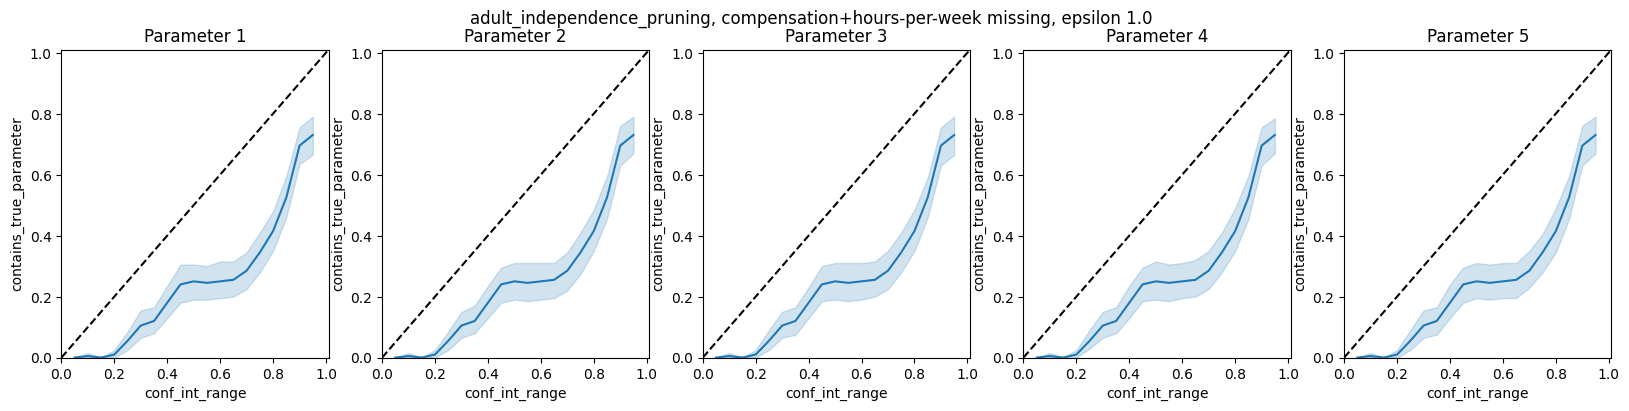

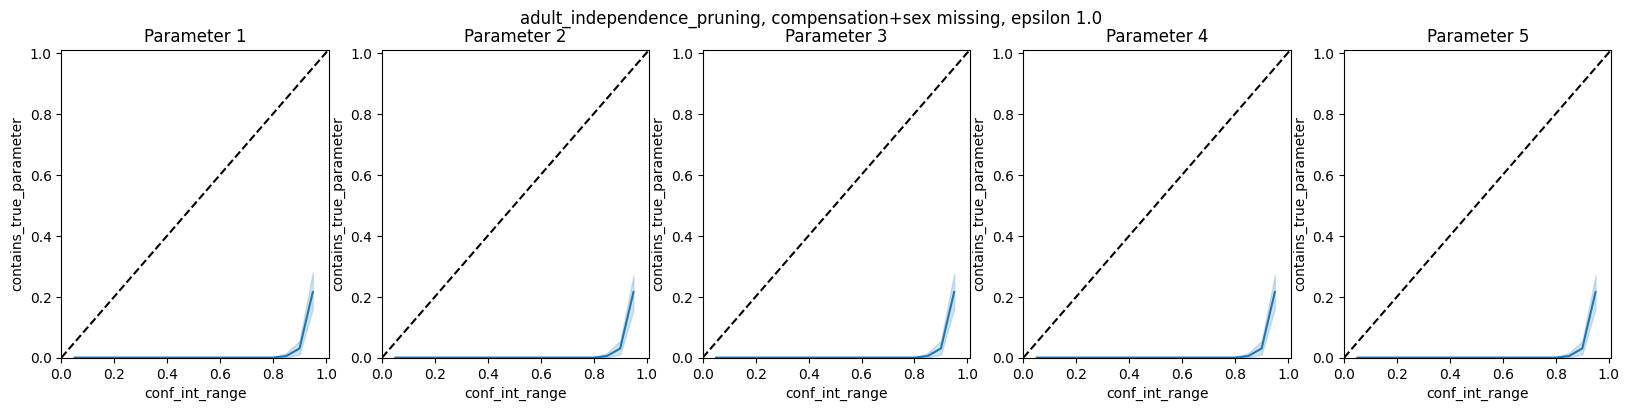

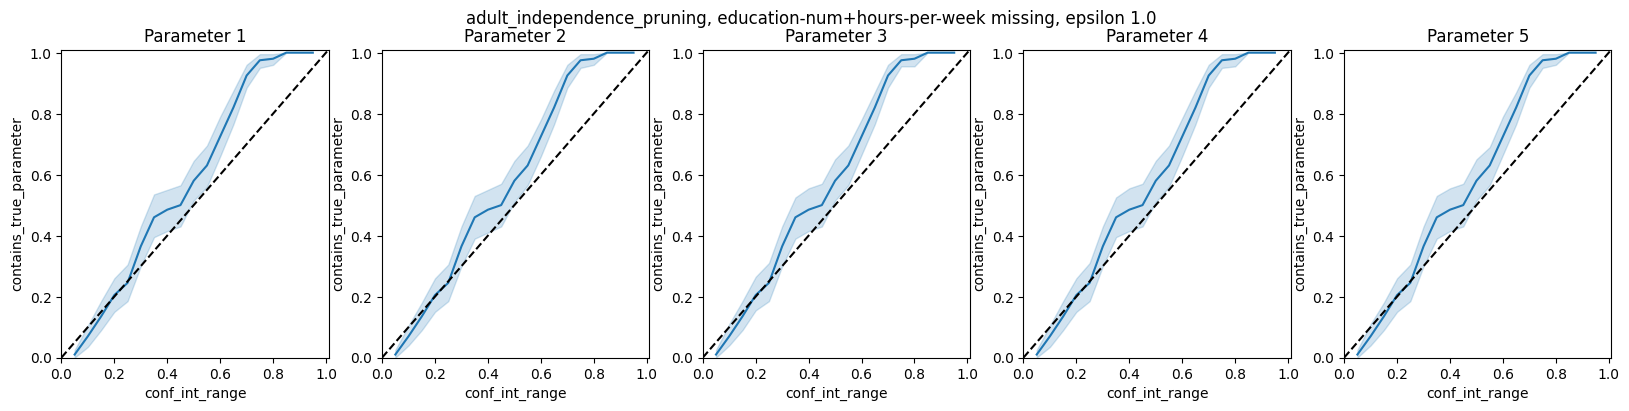

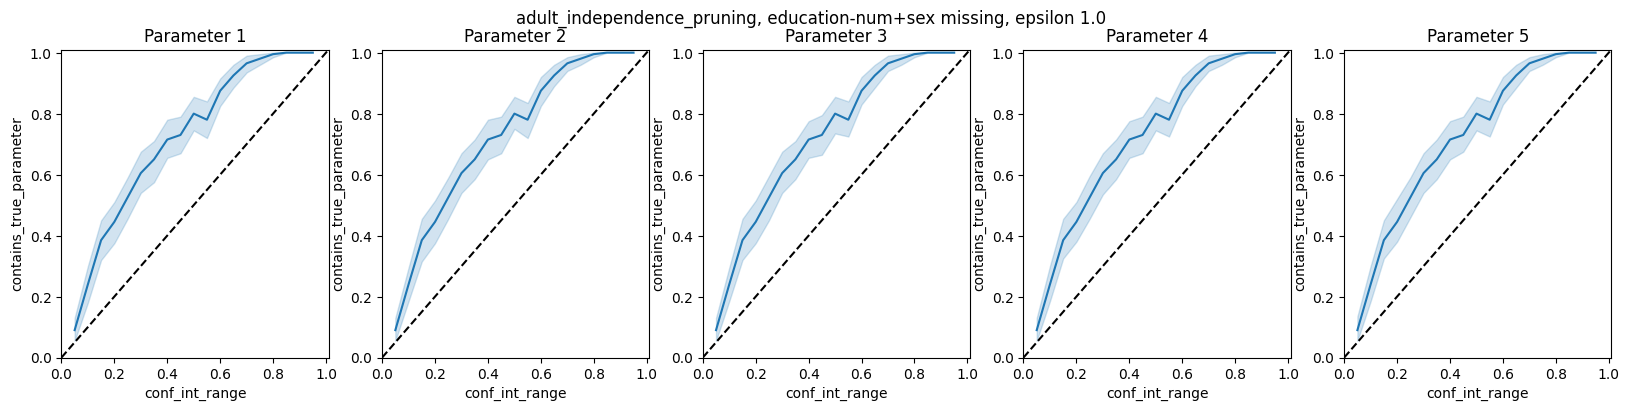

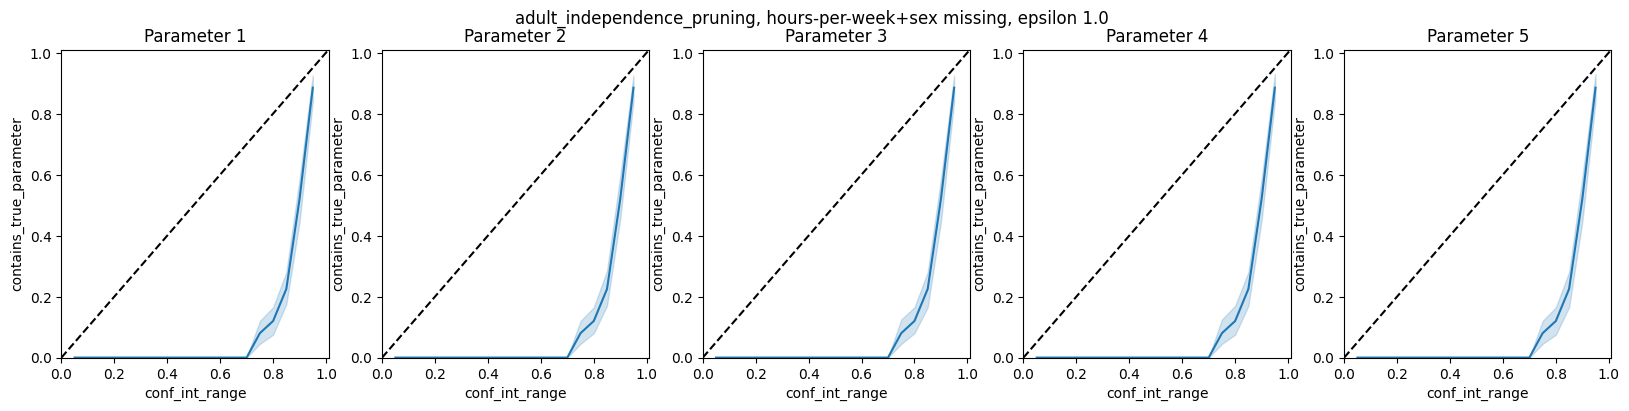

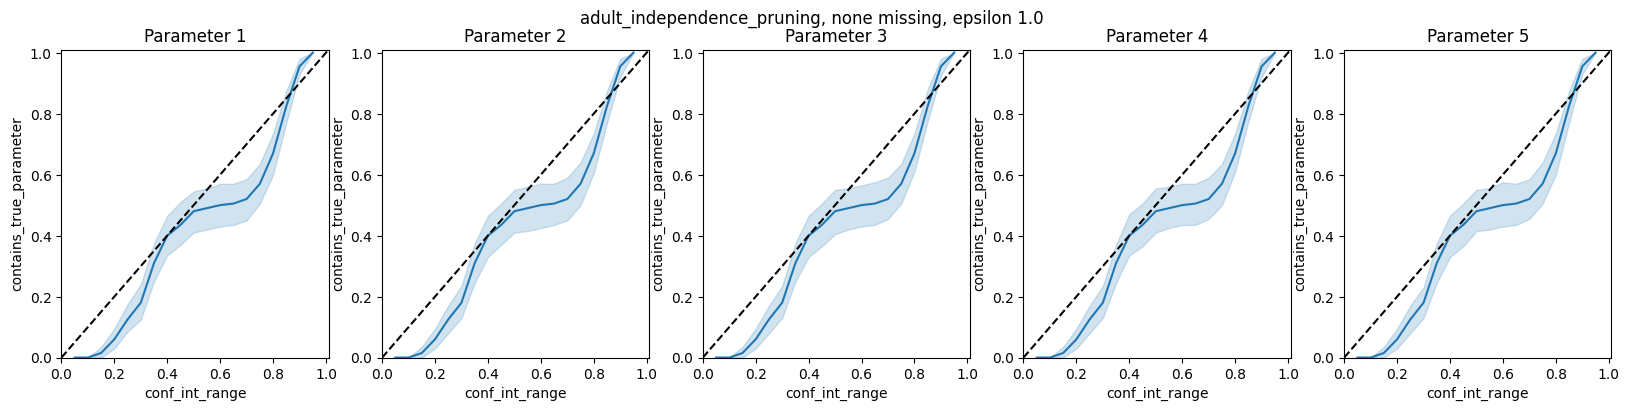

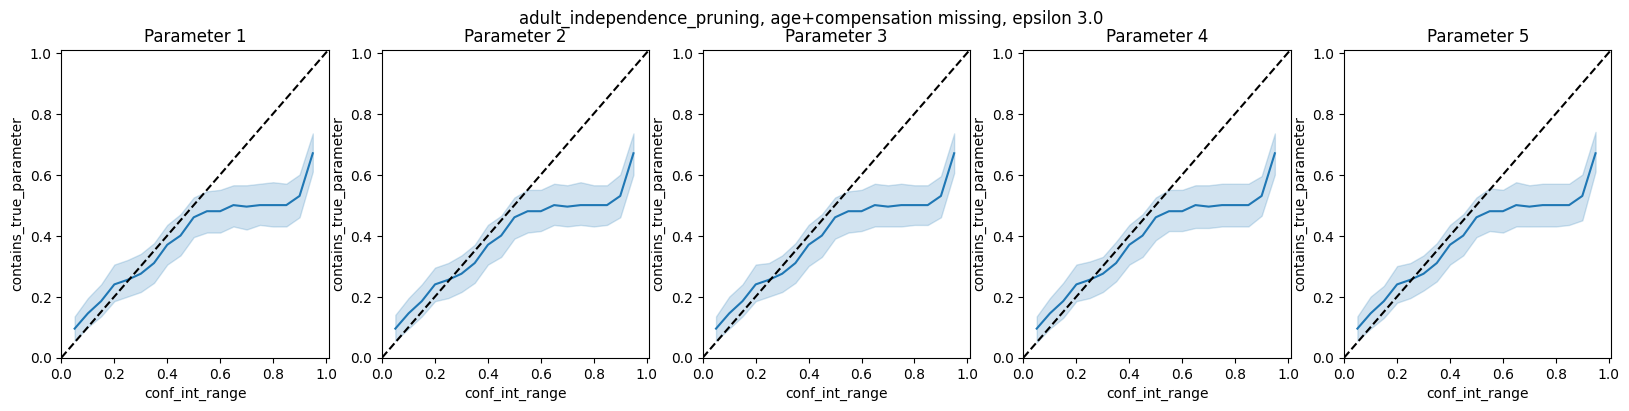

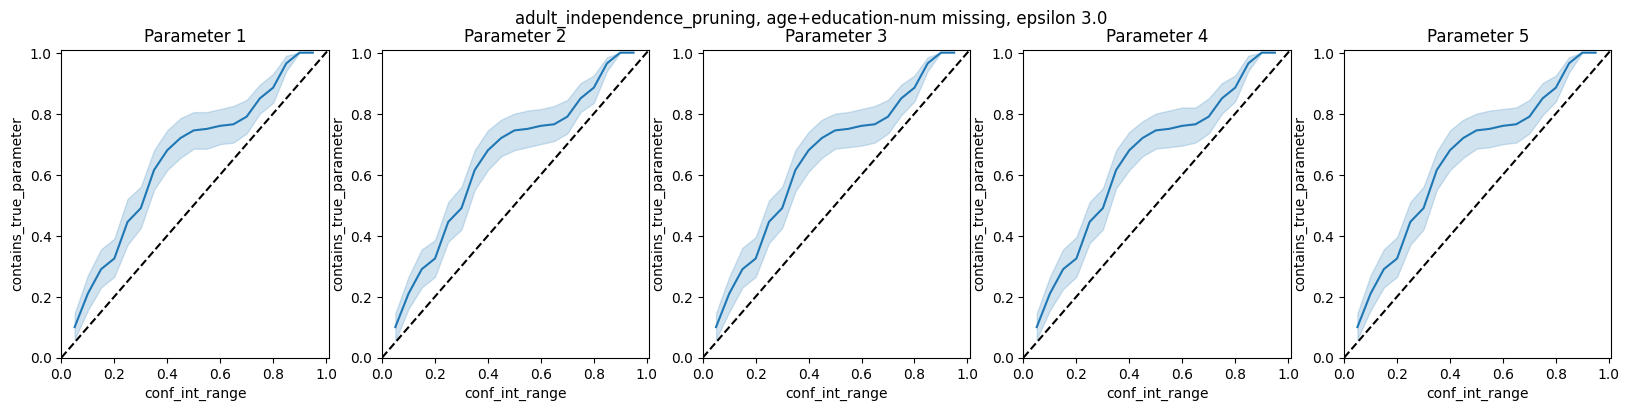

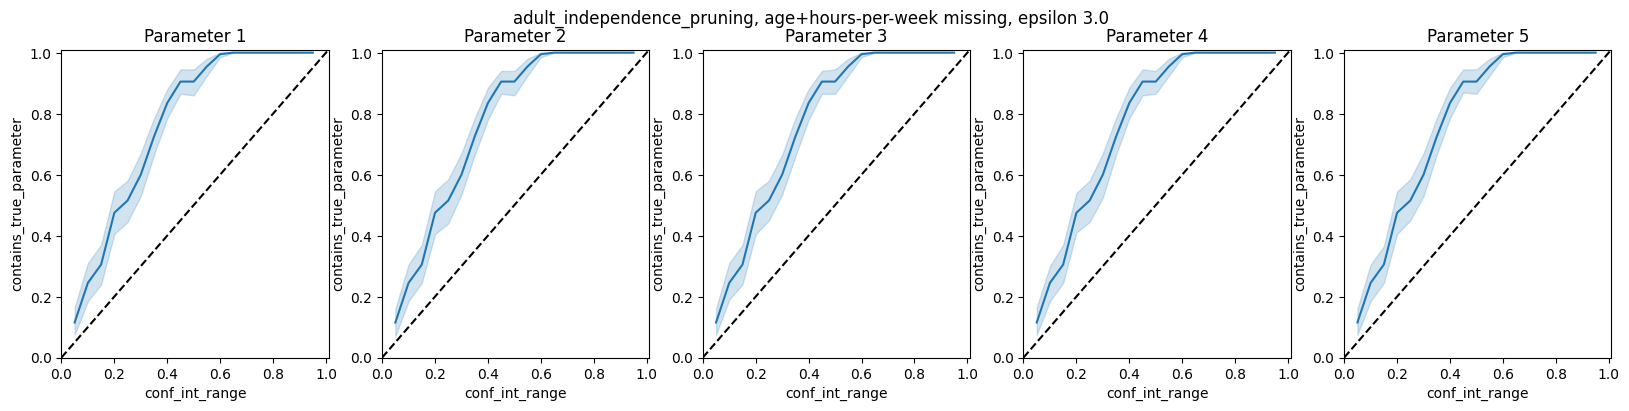

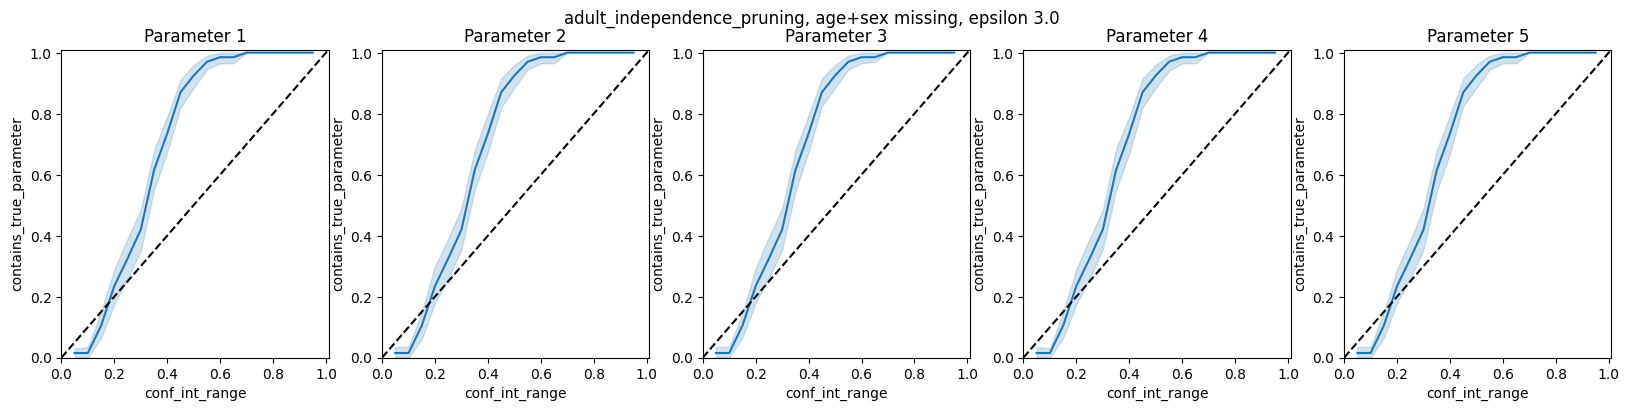

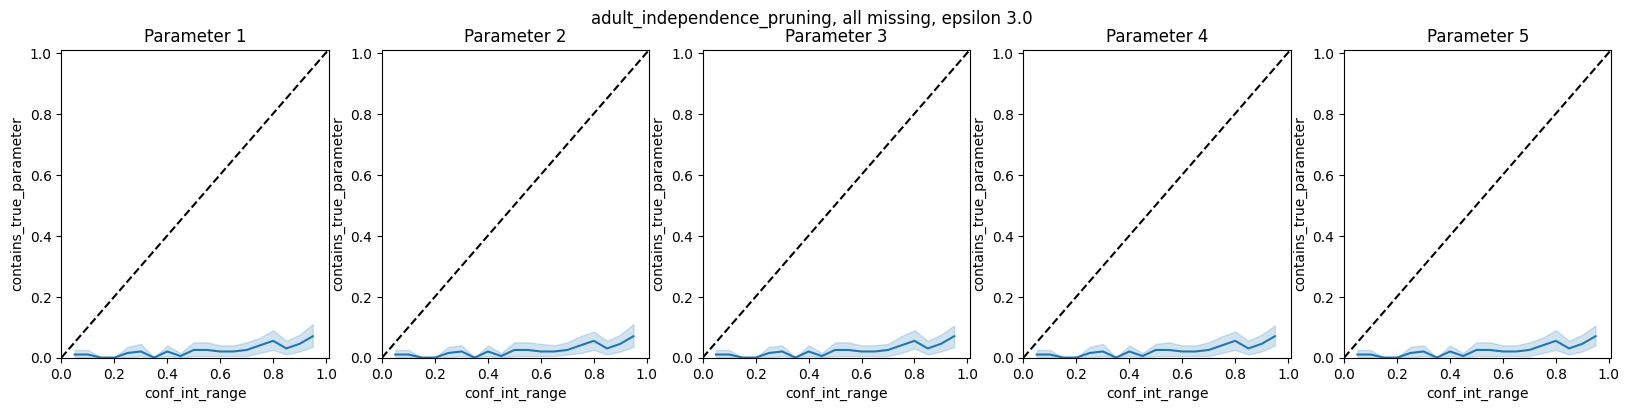

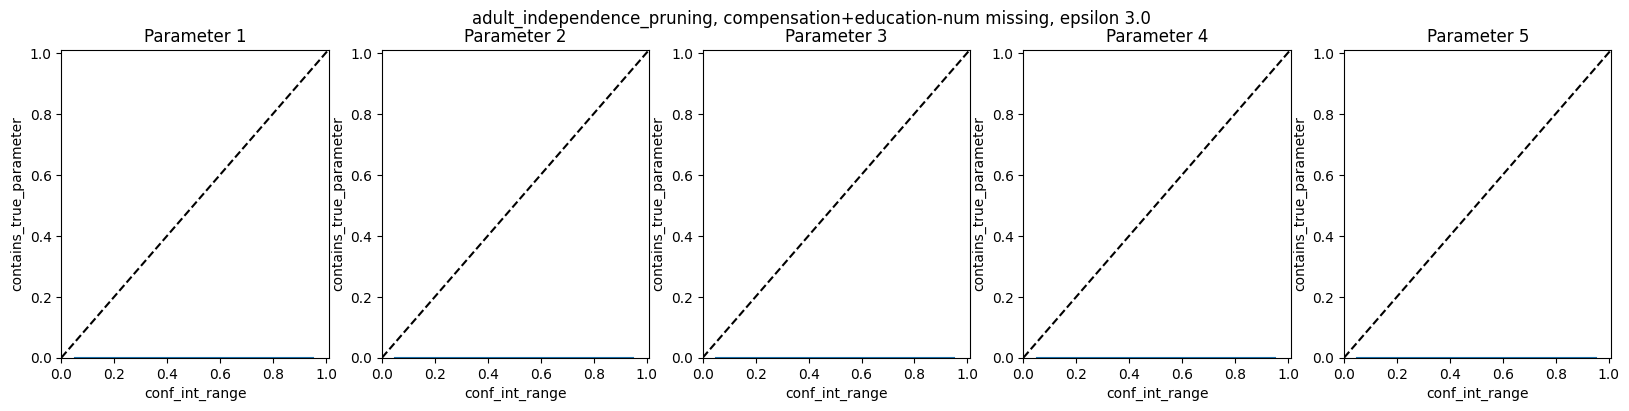

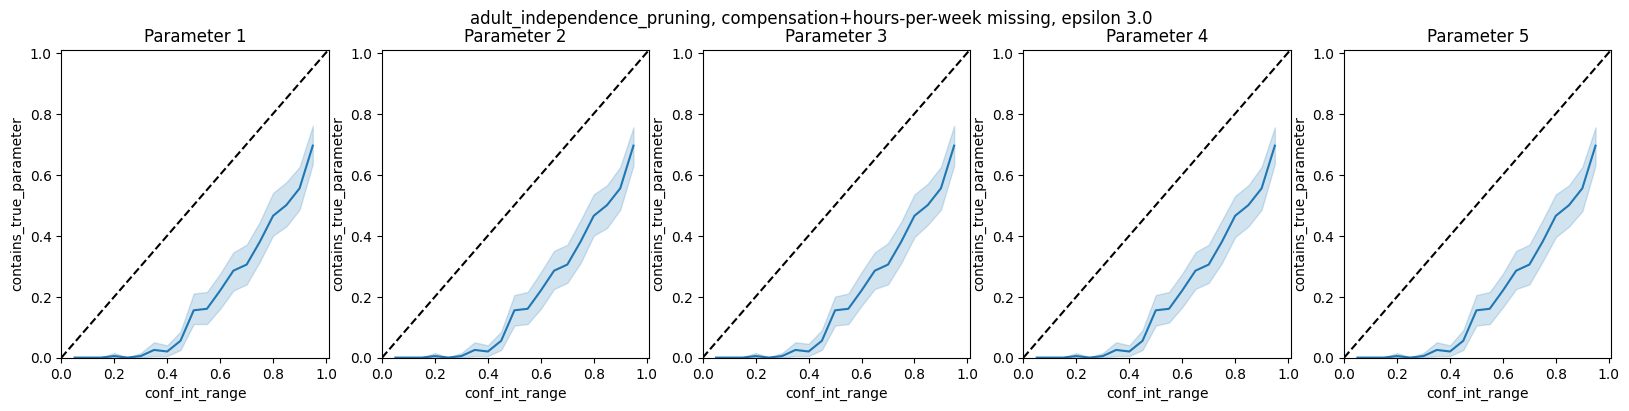

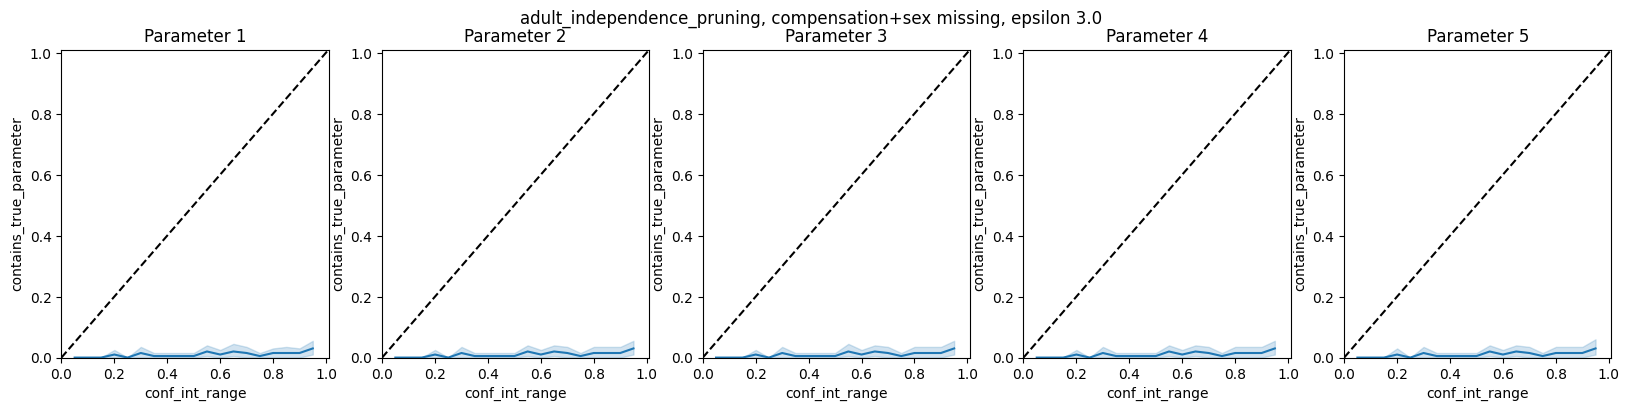

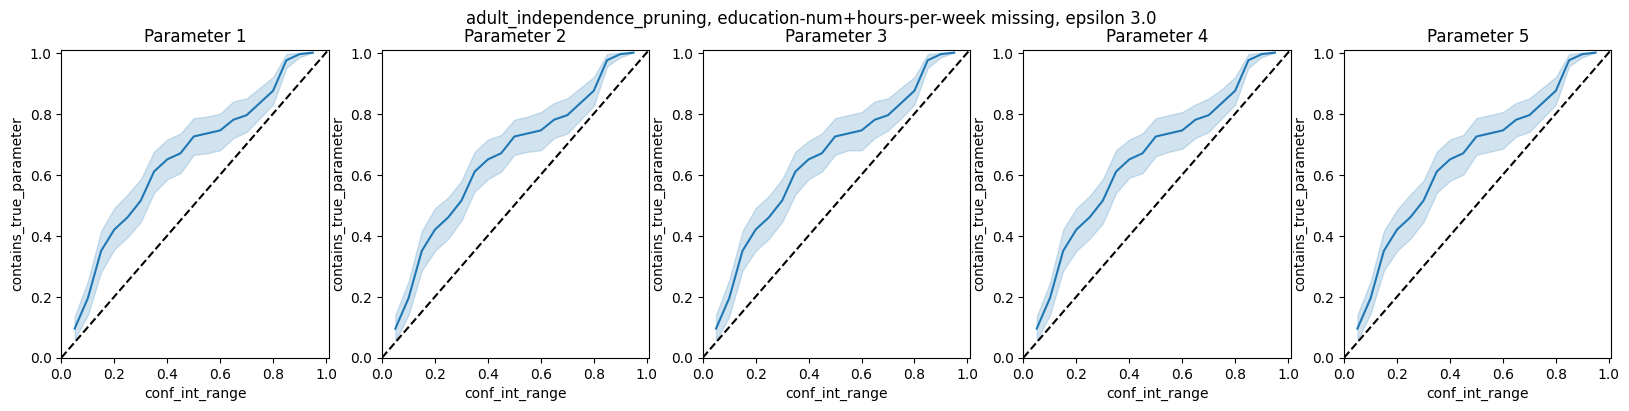

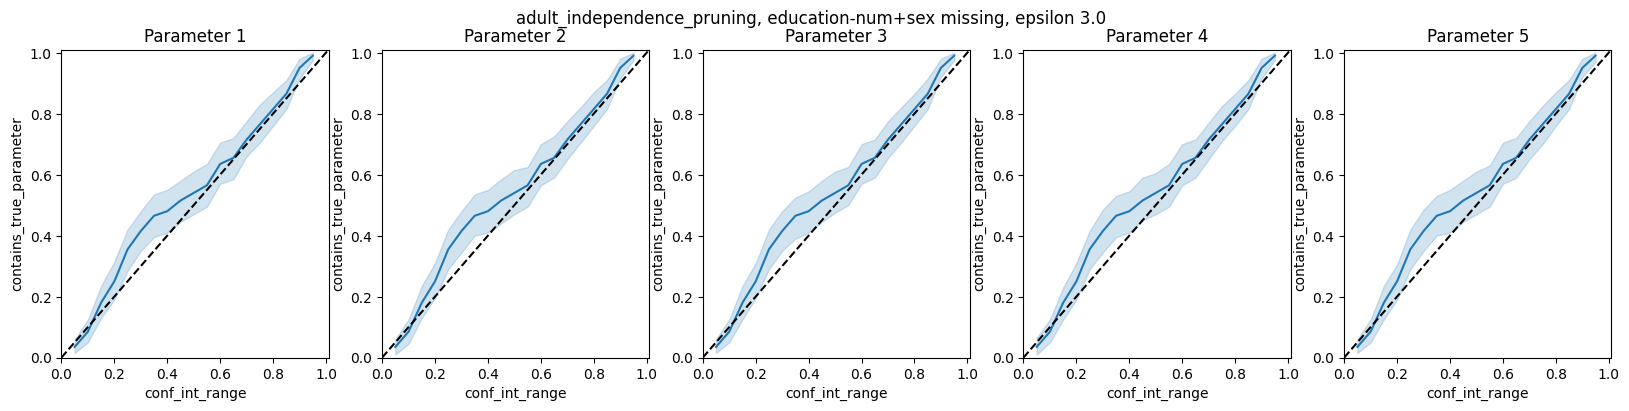

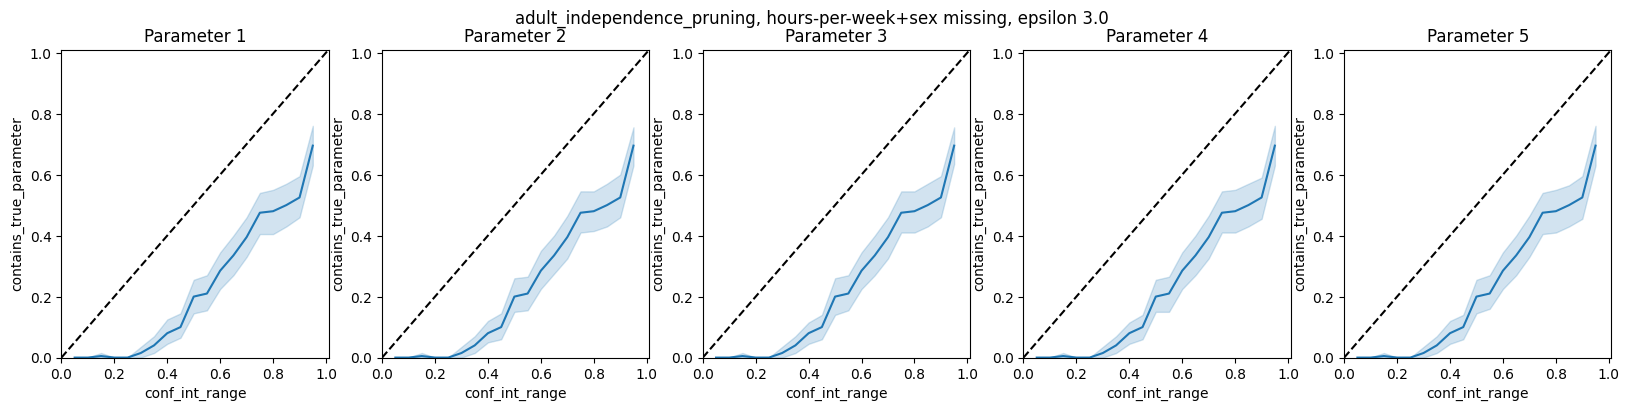

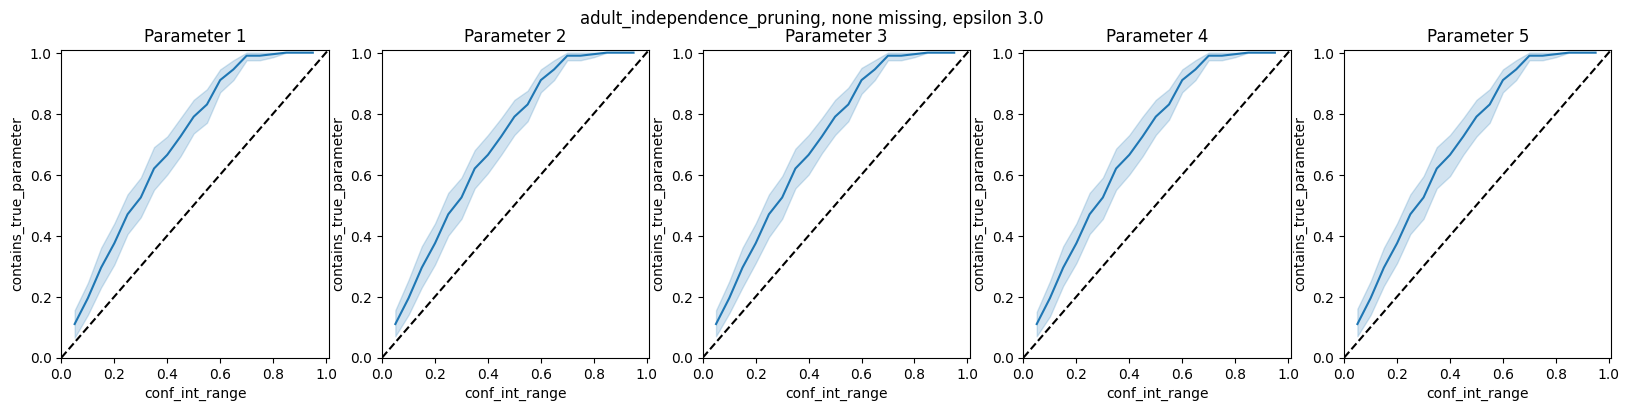

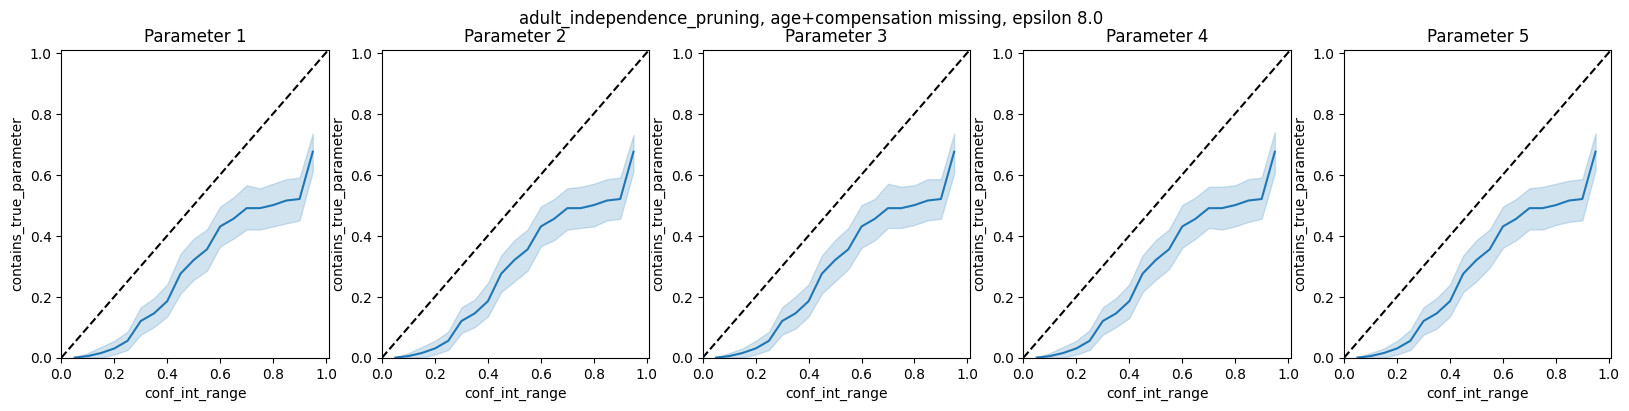

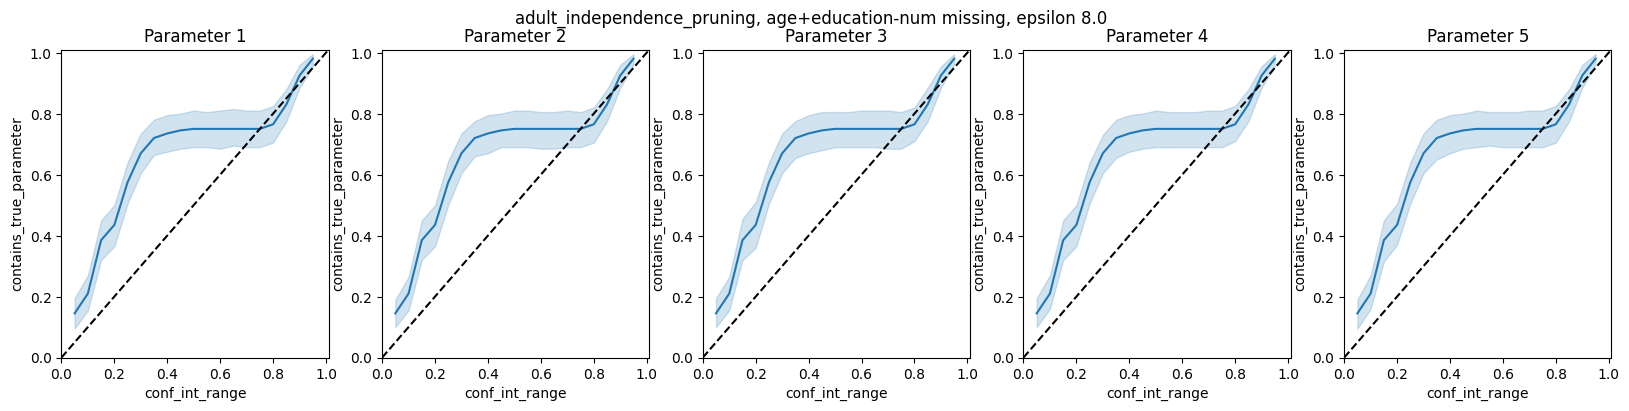

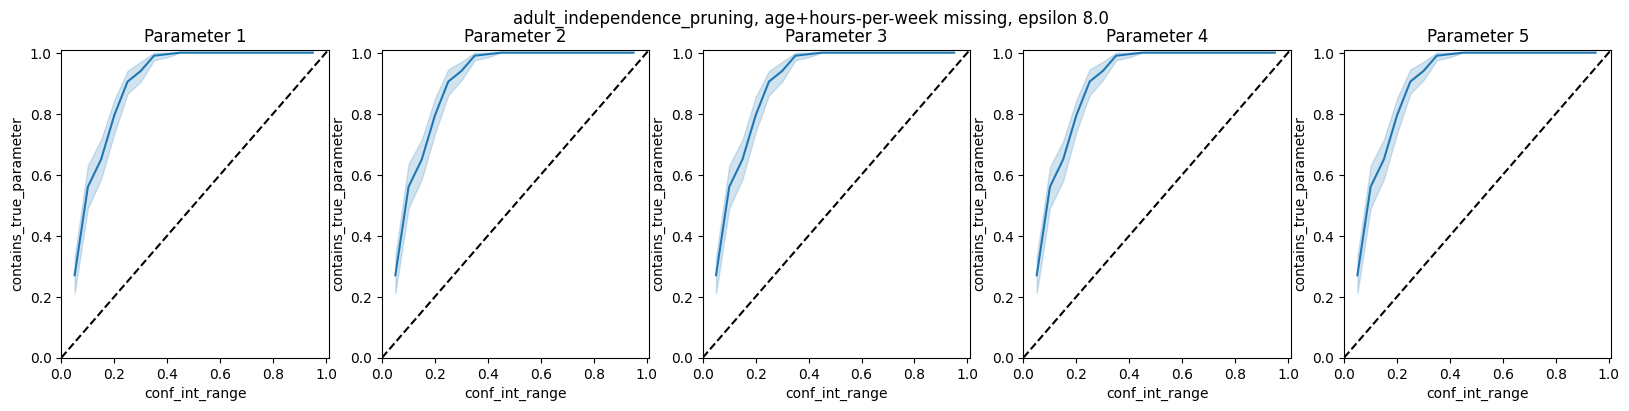

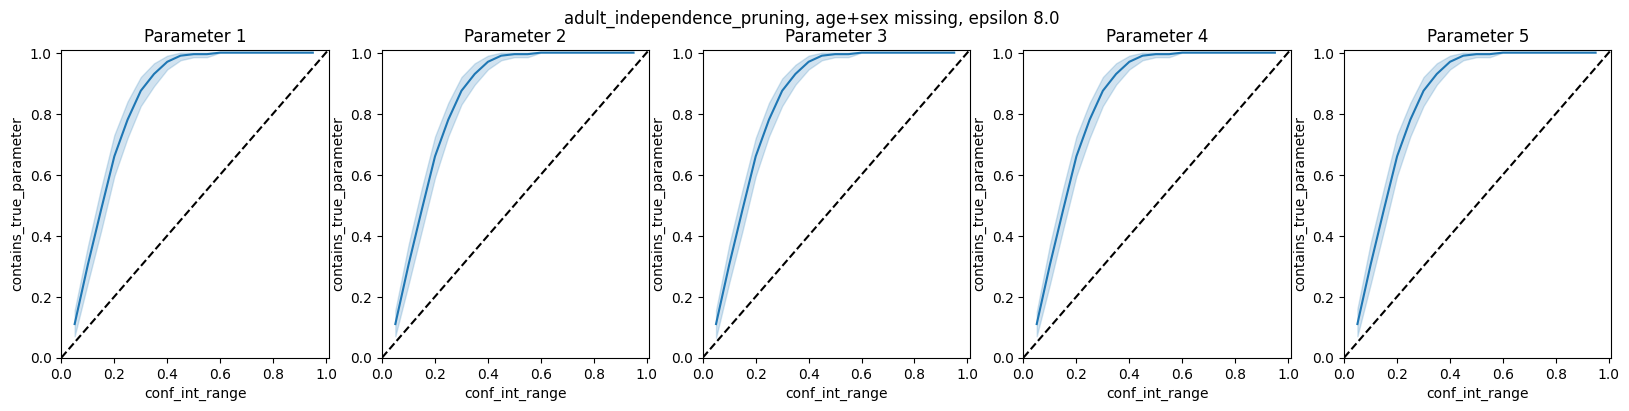

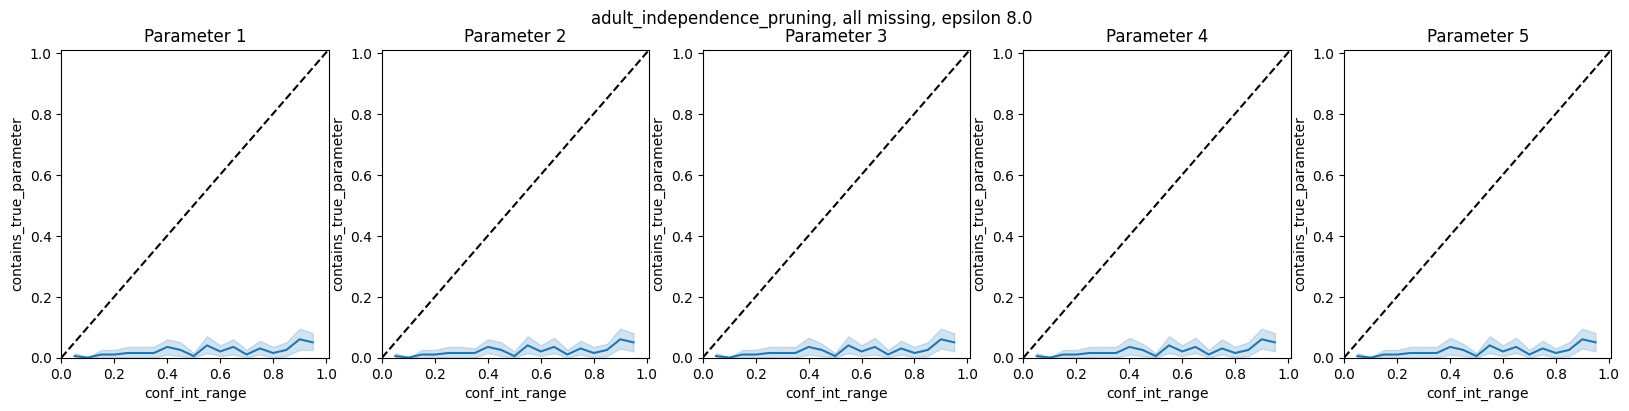

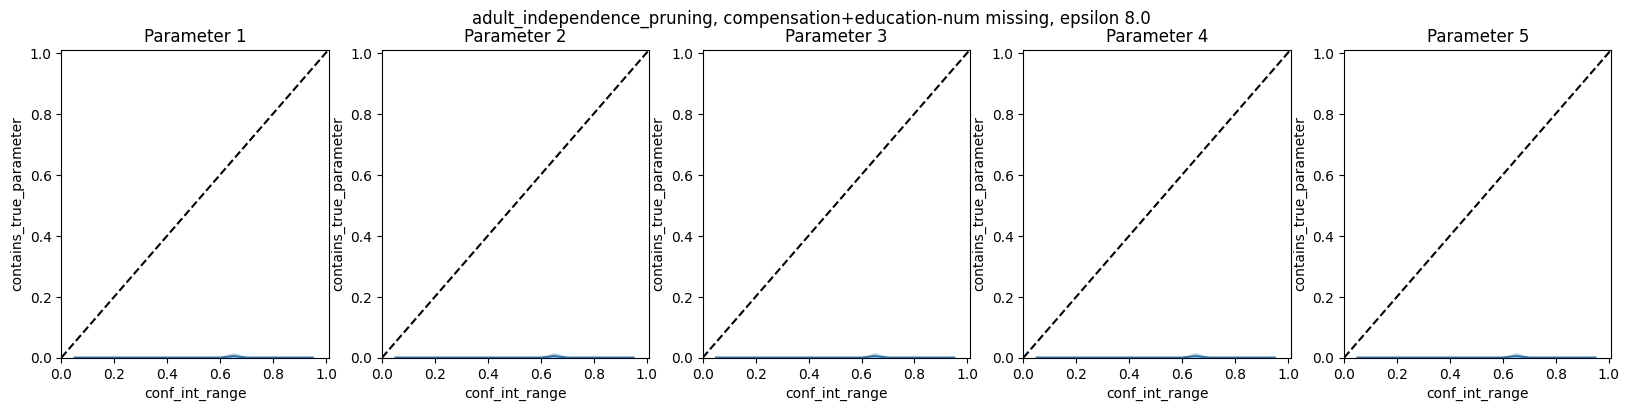

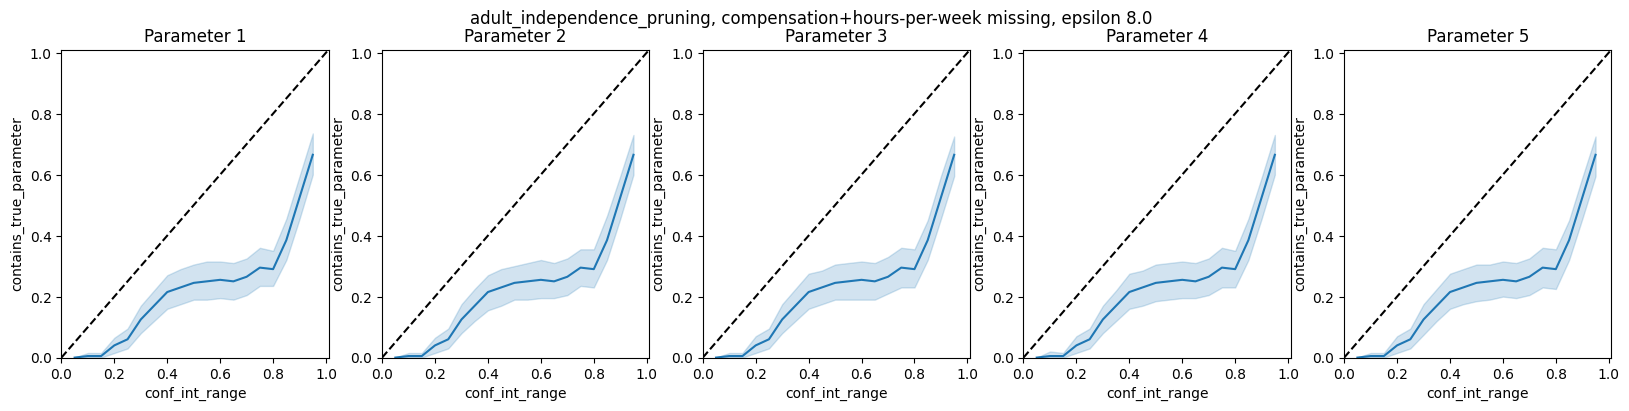

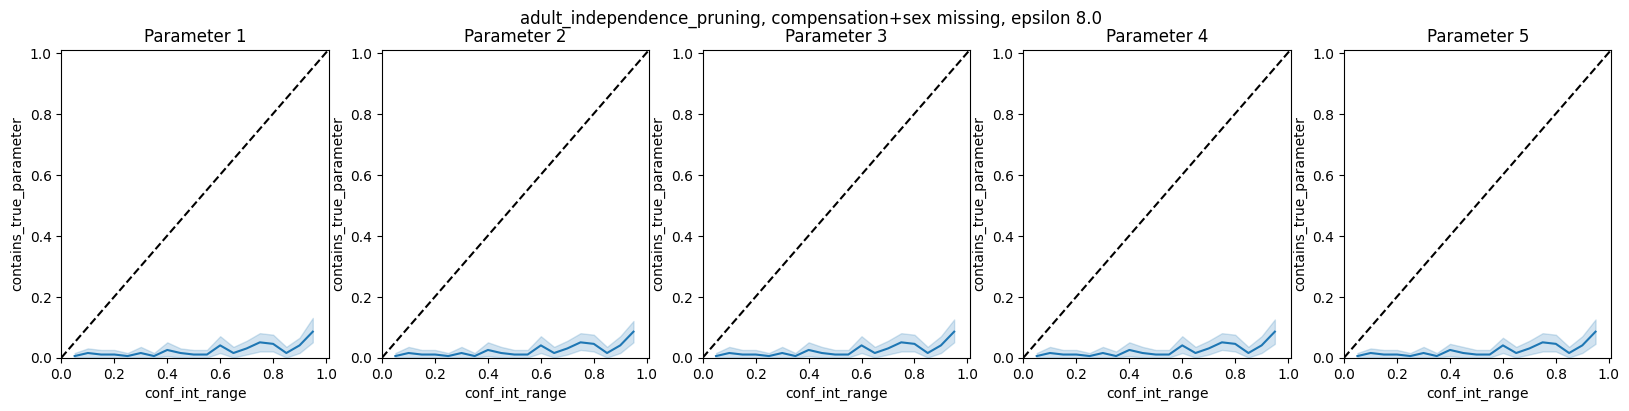

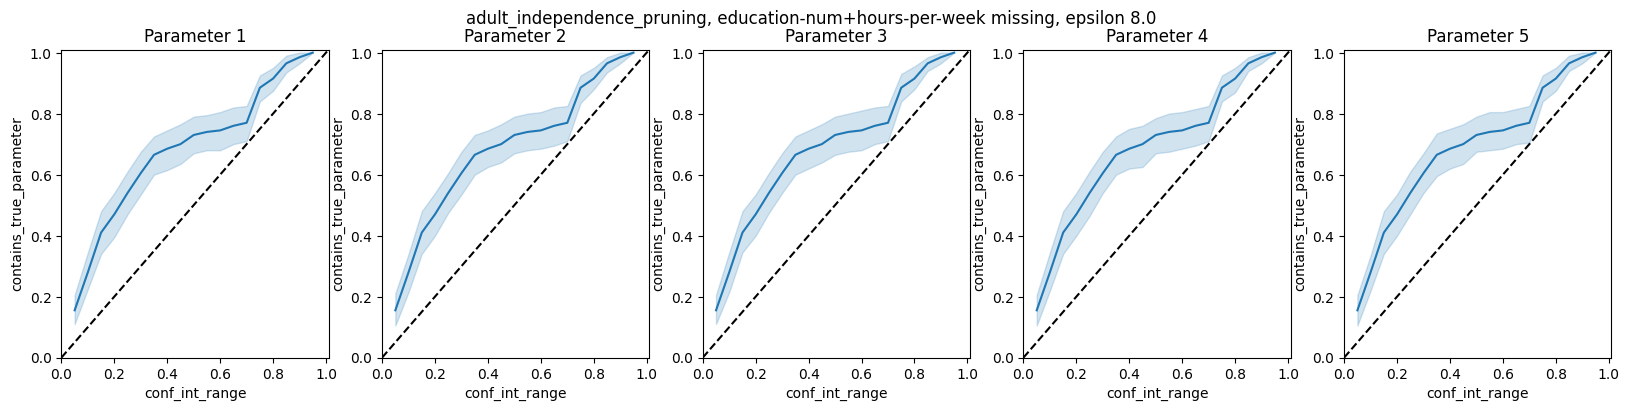

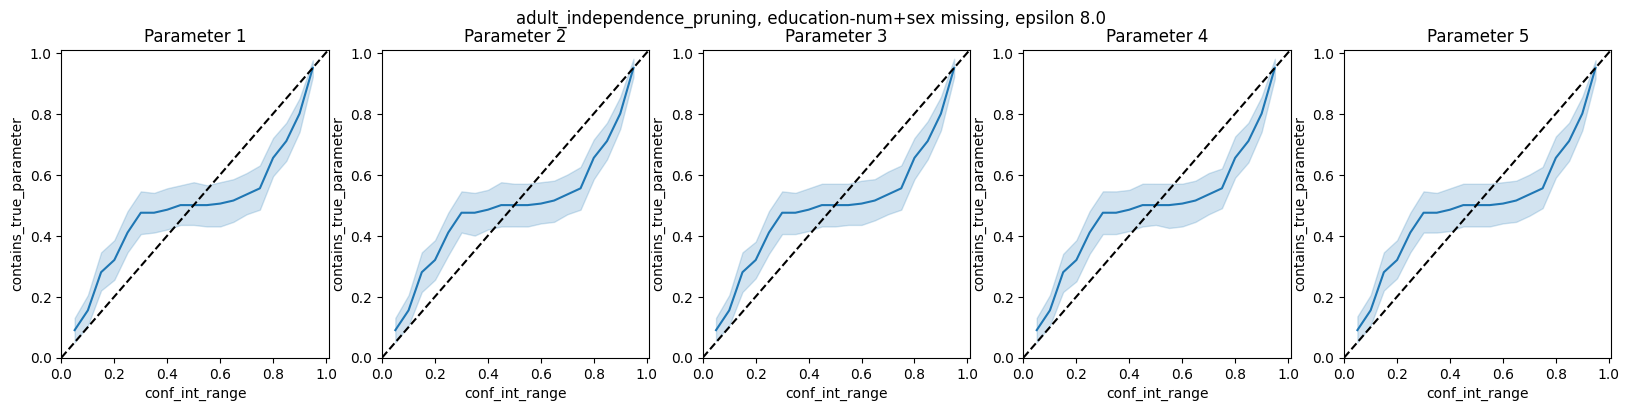

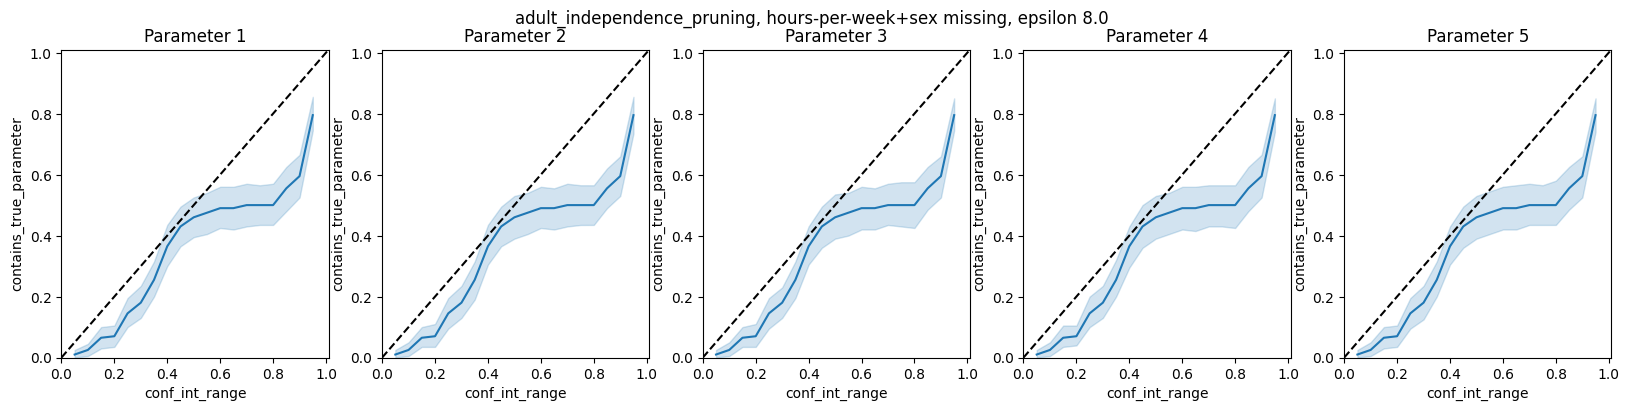

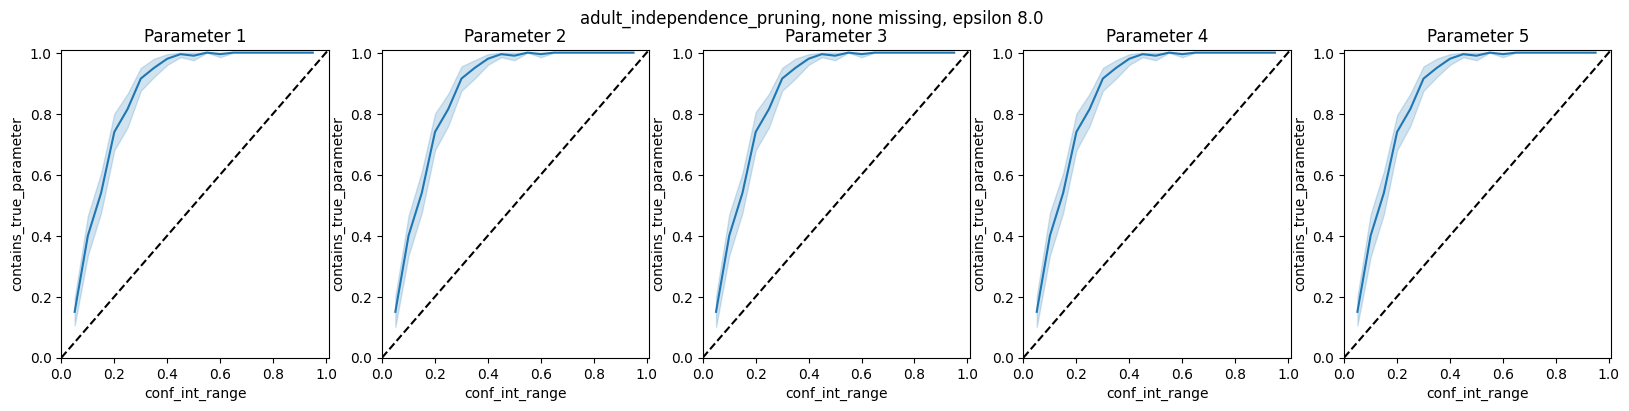

In [8]:
for file in sorted(ci_coverage_files):
    df = pd.read_csv(file)
    original_datset_name = df['original_dataset_name'][0] 
    missing_query = df['missing_query'][0]
    epsilon = df['epsilon'][0]
    
    dims = len(COLUMNS_FOR_DATASET[original_datset_name])
    
    fig, axes = plt.subplots(1, dims, figsize=(dims*4, 4))

    for i in range(dims):
        ax = axes[i]
        g = sns.lineplot(x="conf_int_range", y="contains_true_parameter", markers=True, err_style="band", data=df, ax=ax)
        diag = (0.0, 1.01)
        ax.plot(diag, diag, linestyle="dashed", color="black")
        ax.set_xlim(diag)
        ax.set_ylim(diag)
        ax.set_title(f"Parameter {i+1}")
    
    fig.suptitle(f"{original_datset_name}, {missing_query} missing, epsilon {epsilon}")
    plt.show()